In [1]:
# %pip install --upgrade pandas

In [2]:
# %pip install sklearn

In [3]:
import pandas as pd
#import sweetviz #usado mais pra dados rotulados
import numpy as np
# from sklearn.preprocessing import StandardScaler

In [4]:
rootPath = "C:\\Users\\mlb\\Teste_VOCs\\DataFiles\\AllDatasets\\"
rootPath2 = "C:\\Users\\mlb\\TSC_Data\\"

columnsName = ["0","1","timestamp","TGS826","TGS2611","TGS2603","TGS813","TGS822","TGS2602","TGS823","temperature","pressao","humidity"]

In [5]:
#Load albicans file data ,"c_type"
#data dictionary
# Albicans = 1
# Glabrata = 2
# Haemulonii = 3
# Kodamaea_ohmeri = 4
# Krusei = 5
# Parapsilosis = 6
# tropicalis = 7 #não será implementada agora

# Culture Time
# 1h = 1
# 3h = 2
# 6h =  3
# 24h = 4
# 48h = 5
# week = 6

In [6]:
def load_data(dataset_name,culture_time, species):
    candida_data     = pd.read_csv(rootPath+dataset_name, delim_whitespace=True, header=None, names=columnsName)
    candida_data     = candida_data.drop(["0","1","timestamp","temperature","pressao","humidity"], axis=1)
#     bacteria_data.dropna(inplace=True)
    candida_data.reset_index(drop=True, inplace=True)
    candida_data['culture_time'] = culture_time
    candida_data['species'] = species
    #---------------------------------------------------
    return candida_data

In [7]:
print(pd.__file__)
print(dir(pd))

D:\Programs\envs\RunModelsEnv\lib\site-packages\pandas\__init__.py
['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__deprecated_num_index_names', '__dir__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_is_numpy_dev', '_libs', '_testing', 

In [25]:
%pip install nameof
from nameof import nameof
minCicle = 70
countCicleGeneral = 0

Note: you may need to restart the kernel to use updated packages.


In [26]:
def CheckMinorSize(df, nameOfDF):
    lastIndex = 0
    global minorSize
    ciclo = 0
    global countCicleGeneral
    newLine = []
    print(f"Df name: {nameOfDF}")
    for row in range(0, len(df)-1):
        if np.isnan(df.iloc[row, 0]) and np.isnan(df.iloc[row+1, 0]):
            print(f"Ciclo nº {ciclo} - tamanho: {len(newLine)}")
            if(len(newLine)<minorSize and len(newLine)>minCicle):
                minorSize = len(newLine)
            newLine= []
            lastIndex = row+1
            ciclo = ciclo+1
            countCicleGeneral = countCicleGeneral+1
        else:
            if not np.isnan(df.iloc[row,0]):
                newLine.append(df.iloc[row])

In [27]:
def CheckMinorSize2(df, nameOfDF):
    lastIndex = 0
    global minorSize
    global countCicleGeneral
    ciclo = 0
    newLine = []
    print(f"Df name: {nameOfDF}")
    for row in range(0, len(df)-1):
        if np.isnan(df.iloc[row, 0]):
            print(f"Ciclo nº {ciclo} - tamanho: {len(newLine)}")
            if(len(newLine)<minorSize and len(newLine)>minCicle):
                minorSize = len(newLine)
            newLine= []
            lastIndex = row+1
            ciclo = ciclo+1
            countCicleGeneral = countCicleGeneral+1
        else:
            newLine.append(df.iloc[row])

In [28]:
minorSize = 100000

In [29]:
albicans_1h = load_data("\\albicans_1h.csv", 1, 1)
CheckMinorSize(albicans_1h, nameof(albicans_1h))

albicans_3h =  load_data("\\albicans_3h.csv" , 2, 1)
CheckMinorSize(albicans_3h, nameof(albicans_3h))

albicans_6h = load_data("\\albicans_6h.csv", 3, 1)
CheckMinorSize(albicans_6h, nameof(albicans_6h))

albicans_24hs = load_data("\\albicans_24hs.csv", 4, 1)
CheckMinorSize(albicans_24hs, nameof(albicans_24hs))

albicans_24hs_leitura1 = load_data("\\albicans_24hs_leitura1.csv", 4, 1)
CheckMinorSize2(albicans_24hs_leitura1, nameof(albicans_24hs_leitura1))

albicans_24hs_leitura2 = load_data("\\albicans_24hs_leitura2.csv", 4, 1)
CheckMinorSize2(albicans_24hs_leitura2, nameof(albicans_24hs_leitura2))

albicans_24hs_leitura3 = load_data("\\albicans_24hs_leitura3.csv", 4, 1)
CheckMinorSize2(albicans_24hs_leitura3, nameof(albicans_24hs_leitura3))

albicans_24hs_set_21 = load_data("\\albicans_24hs_set_21.csv", 4, 1)
CheckMinorSize(albicans_24hs_set_21, nameof(albicans_24hs_set_21))

albicans_48hs_leitura1 = load_data("\\albicans_48hs_leitura1.csv", 5, 1)
CheckMinorSize2(albicans_48hs_leitura1, nameof(albicans_48hs_leitura1))

albicans_week_leitura = load_data("\\albicans_week_leitura.csv", 6, 1)
CheckMinorSize(albicans_week_leitura, nameof(albicans_week_leitura))

Df name: albicans_1h
Ciclo nº 0 - tamanho: 3
Ciclo nº 1 - tamanho: 116
Ciclo nº 2 - tamanho: 3
Ciclo nº 3 - tamanho: 121
Ciclo nº 4 - tamanho: 3
Ciclo nº 5 - tamanho: 103
Ciclo nº 6 - tamanho: 3
Ciclo nº 7 - tamanho: 117
Ciclo nº 8 - tamanho: 3
Ciclo nº 9 - tamanho: 93
Df name: albicans_3h
Ciclo nº 0 - tamanho: 3
Ciclo nº 1 - tamanho: 139
Ciclo nº 2 - tamanho: 3
Ciclo nº 3 - tamanho: 139
Ciclo nº 4 - tamanho: 3
Ciclo nº 5 - tamanho: 137
Ciclo nº 6 - tamanho: 3
Ciclo nº 7 - tamanho: 138
Ciclo nº 8 - tamanho: 3
Ciclo nº 9 - tamanho: 137
Df name: albicans_6h
Ciclo nº 0 - tamanho: 3
Ciclo nº 1 - tamanho: 120
Ciclo nº 2 - tamanho: 3
Ciclo nº 3 - tamanho: 140
Ciclo nº 4 - tamanho: 3
Ciclo nº 5 - tamanho: 140
Ciclo nº 6 - tamanho: 3
Ciclo nº 7 - tamanho: 139
Ciclo nº 8 - tamanho: 3
Ciclo nº 9 - tamanho: 137
Df name: albicans_24hs
Ciclo nº 0 - tamanho: 3
Ciclo nº 1 - tamanho: 140
Ciclo nº 2 - tamanho: 3
Ciclo nº 3 - tamanho: 140
Ciclo nº 4 - tamanho: 3
Ciclo nº 5 - tamanho: 139
Ciclo nº 6 - ta

In [13]:
glabrata_1h = load_data("\\glabrata_1h.csv", 1, 2)
CheckMinorSize(glabrata_1h, nameof(glabrata_1h))

glabrata_3h = load_data("\\glabrata_3h.csv", 2, 2)
CheckMinorSize(glabrata_3h, nameof(glabrata_3h))

glabrata_6h = load_data("\\glabrata_6h.csv", 3, 2)
CheckMinorSize(glabrata_6h, nameof(glabrata_6h))

glabrata_24hs = load_data("\\glabrata_24hs.csv", 4, 2)
CheckMinorSize(glabrata_24hs, nameof(glabrata_24hs))

glabrata_24hs_leitura1 = load_data("\\glabrata_24hs_leitura1.csv", 4, 2)
CheckMinorSize(glabrata_24hs_leitura1, nameof(glabrata_24hs_leitura1))

glabrata_24hs_set_21 = load_data("\\glabrata_24hs_set_21.csv", 4, 2)
CheckMinorSize(glabrata_24hs_set_21, nameof(glabrata_24hs_set_21))

glabrata_48hs_leitura1 = load_data("\\glabrata_48hs_leitura1.csv", 5, 2)
CheckMinorSize(glabrata_48hs_leitura1, nameof(glabrata_48hs_leitura1))

Df name: glabrata_1h
Ciclo nº 0 - tamanho: 3
Ciclo nº 1 - tamanho: 124
Ciclo nº 2 - tamanho: 3
Ciclo nº 3 - tamanho: 124
Ciclo nº 4 - tamanho: 3
Ciclo nº 5 - tamanho: 125
Ciclo nº 6 - tamanho: 3
Ciclo nº 7 - tamanho: 123
Ciclo nº 8 - tamanho: 3
Ciclo nº 9 - tamanho: 124
Df name: glabrata_3h
Ciclo nº 0 - tamanho: 3
Ciclo nº 1 - tamanho: 124
Ciclo nº 2 - tamanho: 3
Ciclo nº 3 - tamanho: 127
Ciclo nº 4 - tamanho: 3
Ciclo nº 5 - tamanho: 133
Ciclo nº 6 - tamanho: 118
Ciclo nº 7 - tamanho: 2
Ciclo nº 8 - tamanho: 114
Df name: glabrata_6h
Ciclo nº 0 - tamanho: 3
Ciclo nº 1 - tamanho: 137
Ciclo nº 2 - tamanho: 3
Ciclo nº 3 - tamanho: 124
Ciclo nº 4 - tamanho: 3
Ciclo nº 5 - tamanho: 131
Ciclo nº 6 - tamanho: 3
Ciclo nº 7 - tamanho: 129
Ciclo nº 8 - tamanho: 3
Ciclo nº 9 - tamanho: 138
Df name: glabrata_24hs
Ciclo nº 0 - tamanho: 3
Ciclo nº 1 - tamanho: 141
Ciclo nº 2 - tamanho: 3
Ciclo nº 3 - tamanho: 140
Ciclo nº 4 - tamanho: 3
Ciclo nº 5 - tamanho: 140
Ciclo nº 6 - tamanho: 3
Ciclo nº 7 - t

In [30]:
print(minorSize)

93


In [31]:
haemulonii_48hs_leitura1 = load_data("\\haemulonii_48hs_leitura1.csv", 4, 3)
CheckMinorSize(haemulonii_48hs_leitura1, nameof(haemulonii_48hs_leitura1))

Df name: haemulonii_48hs_leitura1
Ciclo nº 0 - tamanho: 5
Ciclo nº 1 - tamanho: 218
Ciclo nº 2 - tamanho: 5
Ciclo nº 3 - tamanho: 223
Ciclo nº 4 - tamanho: 5
Ciclo nº 5 - tamanho: 219
Ciclo nº 6 - tamanho: 5
Ciclo nº 7 - tamanho: 216
Ciclo nº 8 - tamanho: 5
Ciclo nº 9 - tamanho: 218
Ciclo nº 10 - tamanho: 5
Ciclo nº 11 - tamanho: 218
Ciclo nº 12 - tamanho: 5
Ciclo nº 13 - tamanho: 223
Ciclo nº 14 - tamanho: 5
Ciclo nº 15 - tamanho: 221
Ciclo nº 16 - tamanho: 5
Ciclo nº 17 - tamanho: 220
Ciclo nº 18 - tamanho: 5
Ciclo nº 19 - tamanho: 219
Ciclo nº 20 - tamanho: 5
Ciclo nº 21 - tamanho: 228
Ciclo nº 22 - tamanho: 5
Ciclo nº 23 - tamanho: 221
Ciclo nº 24 - tamanho: 5
Ciclo nº 25 - tamanho: 228
Ciclo nº 26 - tamanho: 5
Ciclo nº 27 - tamanho: 224
Ciclo nº 28 - tamanho: 5
Ciclo nº 29 - tamanho: 219
Ciclo nº 30 - tamanho: 5
Ciclo nº 31 - tamanho: 227
Ciclo nº 32 - tamanho: 5
Ciclo nº 33 - tamanho: 219
Ciclo nº 34 - tamanho: 5
Ciclo nº 35 - tamanho: 224
Ciclo nº 36 - tamanho: 5
Ciclo nº 37 - t

In [32]:
kodamaea_ohmeri_48hs = load_data("\\kodamaea_ohmeri_48hs.csv", 5, 4)
CheckMinorSize(kodamaea_ohmeri_48hs, nameof(kodamaea_ohmeri_48hs))

Df name: kodamaea_ohmeri_48hs
Ciclo nº 0 - tamanho: 5
Ciclo nº 1 - tamanho: 221
Ciclo nº 2 - tamanho: 5
Ciclo nº 3 - tamanho: 223
Ciclo nº 4 - tamanho: 5
Ciclo nº 5 - tamanho: 227
Ciclo nº 6 - tamanho: 5
Ciclo nº 7 - tamanho: 225
Ciclo nº 8 - tamanho: 5
Ciclo nº 9 - tamanho: 224
Ciclo nº 10 - tamanho: 5
Ciclo nº 11 - tamanho: 221
Ciclo nº 12 - tamanho: 5
Ciclo nº 13 - tamanho: 229
Ciclo nº 14 - tamanho: 5
Ciclo nº 15 - tamanho: 227
Ciclo nº 16 - tamanho: 5
Ciclo nº 17 - tamanho: 225
Ciclo nº 18 - tamanho: 5
Ciclo nº 19 - tamanho: 225
Ciclo nº 20 - tamanho: 5
Ciclo nº 21 - tamanho: 224
Ciclo nº 22 - tamanho: 4
Ciclo nº 23 - tamanho: 231
Ciclo nº 24 - tamanho: 5
Ciclo nº 25 - tamanho: 225
Ciclo nº 26 - tamanho: 5
Ciclo nº 27 - tamanho: 224
Ciclo nº 28 - tamanho: 5
Ciclo nº 29 - tamanho: 226
Ciclo nº 30 - tamanho: 5
Ciclo nº 31 - tamanho: 224
Ciclo nº 32 - tamanho: 5
Ciclo nº 33 - tamanho: 220
Ciclo nº 34 - tamanho: 5
Ciclo nº 35 - tamanho: 225
Ciclo nº 36 - tamanho: 5
Ciclo nº 37 - taman

In [33]:
#++
krusei_24hs_leitura1 = load_data("\\krusei_24hs_leitura1.csv", 4, 5)
CheckMinorSize2(krusei_24hs_leitura1, nameof(krusei_24hs_leitura1))

krusei_24hs_leitura2 =  load_data("\\krusei_24hs_leitura2.csv" , 4, 5)
CheckMinorSize2(krusei_24hs_leitura2, nameof(krusei_24hs_leitura2))

krusei_24hs_leitura3 =  load_data("\\krusei_24hs_leitura3.csv" , 4, 5)
CheckMinorSize2(krusei_24hs_leitura3, nameof(krusei_24hs_leitura3))

krusei_24hs_set_21 =  load_data("\\krusei_24hs_set_21.csv" , 4, 5)
CheckMinorSize(krusei_24hs_set_21, nameof(krusei_24hs_set_21))

krusei_48hs_leitura1 =  load_data("\\krusei_48hs_leitura1.csv" , 5, 5)
CheckMinorSize2(krusei_48hs_leitura1, nameof(krusei_48hs_leitura1))

krusei_week_leitura =  load_data("\\krusei_week_leitura.csv" , 6, 5)
CheckMinorSize(krusei_week_leitura, nameof(krusei_week_leitura))

Df name: krusei_24hs_leitura1
Ciclo nº 0 - tamanho: 234
Ciclo nº 1 - tamanho: 240
Ciclo nº 2 - tamanho: 238
Ciclo nº 3 - tamanho: 239
Ciclo nº 4 - tamanho: 244
Ciclo nº 5 - tamanho: 238
Ciclo nº 6 - tamanho: 239
Ciclo nº 7 - tamanho: 241
Ciclo nº 8 - tamanho: 238
Df name: krusei_24hs_leitura2
Ciclo nº 0 - tamanho: 243
Ciclo nº 1 - tamanho: 242
Ciclo nº 2 - tamanho: 241
Ciclo nº 3 - tamanho: 240
Ciclo nº 4 - tamanho: 237
Ciclo nº 5 - tamanho: 238
Ciclo nº 6 - tamanho: 240
Ciclo nº 7 - tamanho: 243
Ciclo nº 8 - tamanho: 238
Df name: krusei_24hs_leitura3
Ciclo nº 0 - tamanho: 239
Ciclo nº 1 - tamanho: 242
Ciclo nº 2 - tamanho: 237
Ciclo nº 3 - tamanho: 238
Ciclo nº 4 - tamanho: 239
Ciclo nº 5 - tamanho: 239
Ciclo nº 6 - tamanho: 241
Ciclo nº 7 - tamanho: 241
Ciclo nº 8 - tamanho: 237
Df name: krusei_24hs_set_21
Ciclo nº 0 - tamanho: 3
Ciclo nº 1 - tamanho: 140
Ciclo nº 2 - tamanho: 3
Ciclo nº 3 - tamanho: 141
Ciclo nº 4 - tamanho: 3
Ciclo nº 5 - tamanho: 140
Ciclo nº 6 - tamanho: 3
Ciclo 

In [34]:
parapsilosis_1h = load_data("\\parapsilosis_1h.csv", 1, 6)
CheckMinorSize(parapsilosis_1h, nameof(parapsilosis_1h))

parapsilosis_3h = load_data("\\parapsilosis_3h.csv", 2, 6)
CheckMinorSize(parapsilosis_3h, nameof(parapsilosis_3h))

parapsilosis_6h = load_data("\\parapsilosis_6h.csv", 3, 6)
CheckMinorSize(parapsilosis_6h, nameof(parapsilosis_6h))

parapsilosis_24hs = load_data("\\parapsilosis_24hs.csv", 4, 6)
CheckMinorSize(parapsilosis_24hs, nameof(parapsilosis_24hs))

parapsilosis_24hs_leitura1 = load_data("\\parapsilosis_24hs_leitura1.csv", 4, 6)
CheckMinorSize2(parapsilosis_24hs_leitura1, nameof(parapsilosis_24hs_leitura1))

parapsilosis_24hs_leitura2 = load_data("\\parapsilosis_24hs_leitura2.csv", 4, 6)
CheckMinorSize2(parapsilosis_24hs_leitura2, nameof(parapsilosis_24hs_leitura2))

parapsilosis_24hs_leitura3 = load_data("\\parapsilosis_24hs_leitura3.csv", 4, 6)
CheckMinorSize2(parapsilosis_24hs_leitura3, nameof(parapsilosis_24hs_leitura3))

parapsilosis_24hs_set_21 = load_data("\\parapsilosis_24hs_set_21.csv", 4, 6)
CheckMinorSize(parapsilosis_24hs_set_21, nameof(parapsilosis_24hs_set_21))

parapsilosis_48hs_leitura1 = load_data("\\parapsilosis_48hs_leitura1.csv", 5, 6)
CheckMinorSize2(parapsilosis_48hs_leitura1, nameof(parapsilosis_48hs_leitura1))

parapsilosis_48hs_leitura2 = load_data("\\parapsilosis_48hs_leitura2.csv", 5, 6)
CheckMinorSize2(parapsilosis_48hs_leitura2, nameof(parapsilosis_48hs_leitura2))

parapsilosis_week_leitura = load_data("\\parapsilosis_week_leitura.csv", 6, 6)
CheckMinorSize(parapsilosis_week_leitura, nameof(parapsilosis_week_leitura))


Df name: parapsilosis_1h
Ciclo nº 0 - tamanho: 3
Ciclo nº 1 - tamanho: 131
Ciclo nº 2 - tamanho: 3
Ciclo nº 3 - tamanho: 137
Ciclo nº 4 - tamanho: 3
Ciclo nº 5 - tamanho: 136
Ciclo nº 6 - tamanho: 3
Ciclo nº 7 - tamanho: 138
Ciclo nº 8 - tamanho: 3
Ciclo nº 9 - tamanho: 139
Df name: parapsilosis_3h
Ciclo nº 0 - tamanho: 3
Ciclo nº 1 - tamanho: 136
Ciclo nº 2 - tamanho: 3
Ciclo nº 3 - tamanho: 136
Ciclo nº 4 - tamanho: 142
Ciclo nº 5 - tamanho: 3
Ciclo nº 6 - tamanho: 140
Ciclo nº 7 - tamanho: 3
Ciclo nº 8 - tamanho: 133
Df name: parapsilosis_6h
Ciclo nº 0 - tamanho: 3
Ciclo nº 1 - tamanho: 140
Ciclo nº 2 - tamanho: 3
Ciclo nº 3 - tamanho: 139
Ciclo nº 4 - tamanho: 3
Ciclo nº 5 - tamanho: 139
Ciclo nº 6 - tamanho: 4
Ciclo nº 7 - tamanho: 140
Ciclo nº 8 - tamanho: 3
Ciclo nº 9 - tamanho: 139
Df name: parapsilosis_24hs
Ciclo nº 0 - tamanho: 143
Ciclo nº 1 - tamanho: 3
Ciclo nº 2 - tamanho: 141
Ciclo nº 3 - tamanho: 3
Ciclo nº 4 - tamanho: 140
Ciclo nº 5 - tamanho: 3
Ciclo nº 6 - tamanho: 

In [35]:
print(countCicleGeneral)

514


In [36]:
albicans_size = (len(albicans_1h)+len(albicans_3h)+len(albicans_6h)
                     +len(albicans_24hs)+len(albicans_24hs_leitura1)+len(albicans_24hs_leitura2) 
                     +len(albicans_24hs_leitura3)+len(albicans_24hs_set_21)+len(albicans_48hs_leitura1
                     +len(albicans_week_leitura)))

glabrata_size = (len(glabrata_1h)+len(glabrata_3h)+len(glabrata_6h)
                     +len(glabrata_24hs)+len(glabrata_24hs_leitura1)+len(glabrata_24hs_set_21)
                     +len(glabrata_48hs_leitura1))

haemulonii_size = (len(haemulonii_48hs_leitura1))
                      
kodamaea_ohmeri_size = (len(kodamaea_ohmeri_48hs))
                      
krusei__size = (len(krusei_24hs_leitura1)+len(krusei_24hs_leitura2)+len(krusei_24hs_leitura3)
                     +len(krusei_24hs_set_21)+len(krusei_48hs_leitura1)
                     +len(krusei_week_leitura))
# OK
parapsilosis__size = (len(parapsilosis_1h)+len(parapsilosis_3h)+len(parapsilosis_6h)
                     +len(parapsilosis_24hs)+len(parapsilosis_24hs_leitura1)
                     +len(parapsilosis_24hs_leitura2)+len(parapsilosis_24hs_leitura3)
                     +len(parapsilosis_24hs_set_21)+len(parapsilosis_48hs_leitura1)
                     +len(parapsilosis_48hs_leitura2)+len(parapsilosis_week_leitura))
print(albicans_size+glabrata_size+haemulonii_size+kodamaea_ohmeri_size+krusei__size+parapsilosis__size)
print(f"albicans_size: {albicans_size}")
print(f"glabrata_size: {glabrata_size}")
print(f"haemulonii_size: {haemulonii_size}")
print(f"kodamaea_ohmeri_size: {kodamaea_ohmeri_size}")
print(f"krusei__size: {krusei__size}")
print(f"parapsilosis__size: {parapsilosis__size}")

90802
albicans_size: 20189
glabrata_size: 19068
haemulonii_size: 6989
kodamaea_ohmeri_size: 7067
krusei__size: 17255
parapsilosis__size: 20234


In [37]:
def convertDataFrame(newCicleDF):
    newDF = []
    newCicleDF = newCicleDF.dropna()
    print(f"New Cicle DF Size: {len(newCicleDF)}")
    print(f"New Cicle DF columns: {len(newCicleDF.columns)}")
    for row in range(len(newCicleDF)):
        for colIndex, col in enumerate(newCicleDF.columns):
            if not col == "species" and not col == "culture_time":
                newDF.append(newCicleDF.iloc[row,colIndex])
    newDF.append(newCicleDF.iloc[0]["culture_time"])
    newDF.append(newCicleDF.iloc[0]["species"])
#     print(pd.DataFrame(newDF).T)
    return pd.DataFrame(newDF).T.dropna()

In [38]:
a = kodamaea_ohmeri_48hs[:93]
convertDataFrame(a)
# kodamaea_ohmeri_48hs[:93]

New Cicle DF Size: 90
New Cicle DF columns: 9


,0,1,2,3,4,5,6,7,8,9,...,622,623,624,625,626,627,628,629,630,631
0,95610.0,7305.0,6020.0,60440.0,3980.0,33280.0,8021.0,95610.0,7305.0,6020.0,...,3001.0,22500.0,52520.0,20650.0,40010.0,275.4,916.6,3009.0,5.0,4.0


In [39]:
#corrigir aqui... Criar novo DF com os ciclos reduzidos, eliminando os com quantidades muti baixas 
def MakeDataEqual(df,nameOfDF):
    lastIndex = 0
    global minorSize
    ciclo = 0
    newLine = []
    newDF = pd.DataFrame()
    print(f"Df name: {nameOfDF}")
    for row in range(0, len(df)-1):
        count = 0
        if np.isnan(df.iloc[row, 0]) and np.isnan(df.iloc[row+1, 0]):
            auxDf = df.copy()
            DfCicle = auxDf[lastIndex:row-1]  
            DfCicle = DfCicle.dropna()   
            sizeCiclo = len(DfCicle)
            print(f"*** Size of cicle 1: {sizeCiclo} ***")
            if(sizeCiclo>minorSize):
                print(f"*** Size of cicle: {sizeCiclo} ***")
                print(f"LastIndex: {lastIndex} Row: {row}")
#                 print(df[lastIndex:row])
                beginAdjust = int((sizeCiclo - minorSize)/2)
                endAdjust = int((sizeCiclo - minorSize)/2)+((sizeCiclo - minorSize)%2)
                print(f"Minor: {minorSize}, beginAdjust {beginAdjust},  endAdjust {endAdjust}, sizeCiclo {sizeCiclo}")
                print(f"Row: {row} -- endAdjust: {endAdjust} !! row-endAdjust {row-endAdjust}")
                print(f"lastIndex: {lastIndex} !! lastIndex+beginAdjust {lastIndex+beginAdjust}")
                newCicloDF = DfCicle[beginAdjust:len(DfCicle)-endAdjust]
                print(f"New Ciclo Size: {len(newCicloDF)}")
                newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
                print(convertDataFrame(newCicloDF))
            lastIndex = row+1
            ciclo = ciclo+1
    return newDF

In [40]:
def MakeDataEqual2(df,nameOfDF):
    lastIndex = 0
    global minorSize
    ciclo = 0
    newLine = []
    newDF = pd.DataFrame()
    print(f"Df name: {nameOfDF}")
    for row in range(0, len(df)-1):
        count = 0
        if np.isnan(df.iloc[row, 0]):
            auxDf = df.copy()
            DfCicle = auxDf[lastIndex:row-1]  
            DfCicle = DfCicle.dropna()   
            sizeCiclo = len(DfCicle)
            print(f"+++ Size of cicle 1: {sizeCiclo} +++")
            if(sizeCiclo>minorSize):
                print(f"+++ Size of cicle: {sizeCiclo} +++")
                print(f"LastIndex: {lastIndex} Row: {row}")
#                 print(df[lastIndex:row])
                beginAdjust = int((sizeCiclo - minorSize)/2)
                endAdjust = int((sizeCiclo - minorSize)/2)+((sizeCiclo - minorSize)%2)
                print(f"Minor: {minorSize}, beginAdjust {beginAdjust},  endAdjust {endAdjust}, sizeCiclo {sizeCiclo}")
                print(f"Row: {row} -- endAdjust: {endAdjust} !! row-endAdjust {row-endAdjust}")
                print(f"lastIndex: {lastIndex} !! lastIndex+beginAdjust {lastIndex+beginAdjust}")
                newCicloDF = DfCicle[beginAdjust:len(DfCicle)-endAdjust]
                print(f"New Ciclo Size : {len(newCicloDF)}")
                newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
                print(convertDataFrame(newCicloDF))
            lastIndex = row+1
            ciclo = ciclo+1
    return newDF

In [41]:
# TO DO...
# Do data adjustment here. Divide each data frame by cicle. 
# See code in candida albicans and glabara file to get ciclos every double rows with NaNs
newDF = pd.DataFrame()
newDF = newDF.append(MakeDataEqual(albicans_1h,nameof(albicans_1h)))
newDF = newDF.append(MakeDataEqual(albicans_3h,nameof(albicans_3h)))
newDF = newDF.append(MakeDataEqual(albicans_6h,nameof(albicans_6h)))
newDF = newDF.append(MakeDataEqual(albicans_24hs,nameof(albicans_24hs)))
newDF = newDF.append(MakeDataEqual2(albicans_24hs_leitura1,nameof(albicans_24hs_leitura1)))
newDF = newDF.append(MakeDataEqual2(albicans_24hs_leitura2,nameof(albicans_24hs_leitura2)))
newDF = newDF.append(MakeDataEqual2(albicans_24hs_leitura3,nameof(albicans_24hs_leitura3)))
newDF = newDF.append(MakeDataEqual(albicans_24hs_set_21,nameof(albicans_24hs_set_21)))
newDF = newDF.append(MakeDataEqual(albicans_48hs_leitura1,nameof(albicans_48hs_leitura1)))
newDF = newDF.append(MakeDataEqual(albicans_week_leitura,nameof(albicans_week_leitura)))

newDF = newDF.append(MakeDataEqual(glabrata_1h,nameof(glabrata_1h)))
newDF = newDF.append(MakeDataEqual(glabrata_6h,nameof(glabrata_6h)))
newDF = newDF.append(MakeDataEqual(glabrata_24hs,nameof(glabrata_24hs)))
newDF = newDF.append(MakeDataEqual(glabrata_24hs_leitura1,nameof(glabrata_24hs_leitura1)))
newDF = newDF.append(MakeDataEqual(glabrata_24hs_set_21,nameof(glabrata_24hs_set_21)))
newDF = newDF.append(MakeDataEqual(glabrata_48hs_leitura1,nameof(glabrata_48hs_leitura1)))

newDF = newDF.append(MakeDataEqual(haemulonii_48hs_leitura1,nameof(haemulonii_48hs_leitura1)))

newDF = newDF.append(MakeDataEqual(kodamaea_ohmeri_48hs,nameof(kodamaea_ohmeri_48hs)))

newDF = newDF.append(MakeDataEqual2(krusei_24hs_leitura1 ,nameof(krusei_24hs_leitura1 )))
newDF = newDF.append(MakeDataEqual2(krusei_24hs_leitura2,nameof(krusei_24hs_leitura2)))
newDF = newDF.append(MakeDataEqual2(krusei_24hs_leitura3,nameof(krusei_24hs_leitura3)))
newDF = newDF.append(MakeDataEqual(krusei_24hs_set_21,nameof(krusei_24hs_set_21)))
newDF = newDF.append(MakeDataEqual2(krusei_48hs_leitura1,nameof(krusei_48hs_leitura1)))
newDF = newDF.append(MakeDataEqual(krusei_week_leitura,nameof(krusei_week_leitura)))

newDF = newDF.append(MakeDataEqual(parapsilosis_1h,nameof(parapsilosis_1h)))
newDF = newDF.append(MakeDataEqual(parapsilosis_3h,nameof(parapsilosis_3h)))
newDF = newDF.append(MakeDataEqual(parapsilosis_6h,nameof(parapsilosis_6h)))
newDF = newDF.append(MakeDataEqual2(parapsilosis_24hs_leitura1,nameof(parapsilosis_24hs_leitura1)))
newDF = newDF.append(MakeDataEqual2(parapsilosis_24hs_leitura2,nameof(parapsilosis_24hs_leitura2)))
newDF = newDF.append(MakeDataEqual2(parapsilosis_24hs_leitura3,nameof(parapsilosis_24hs_leitura3)))
newDF = newDF.append(MakeDataEqual(parapsilosis_24hs_set_21 ,nameof(parapsilosis_24hs_set_21 )))

newDF = newDF.append(MakeDataEqual2(parapsilosis_48hs_leitura1 ,nameof(parapsilosis_48hs_leitura1)))
newDF = newDF.append(MakeDataEqual2(parapsilosis_48hs_leitura2  ,nameof(parapsilosis_48hs_leitura2)))
newDF = newDF.append(MakeDataEqual(parapsilosis_week_leitura ,nameof(parapsilosis_week_leitura)))

Df name: albicans_1h
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 115 ***
*** Size of cicle: 115 ***
LastIndex: 4 Row: 123
Minor: 93, beginAdjust 11,  endAdjust 11, sizeCiclo 115
Row: 123 -- endAdjust: 11 !! row-endAdjust 112
lastIndex: 4 !! lastIndex+beginAdjust 15
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3       4       5       6        7    \
0  70450.0  15810.0  21560.0  40510.0  1025.0  4019.0  5741.0  70740.0   

       8        9    ...     643       644     645      646      647     648  \
0  16020.0  21410.0  ...  6977.0  114000.0  7418.0  10230.0  46130.0  2212.0   

       649     650  651  652  
0  13080.0  6978.0  1.0  1.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 120 ***
*** Size of cicle: 120 ***
LastIndex: 129 Row: 253
Minor: 93, beginAdjust 13,  endAdjust 14, sizeCiclo 120
Row: 253 -- endAdjust: 14 !! row-endAdjust 239
lastIndex: 12

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

       0        1        2        3      4       5       6        7    \
0  68840.0  20710.0  21720.0  59840.0  897.3  3698.0  5535.0  68880.0   

       8        9    ...     643       644     645      646      647     648  \
0  20810.0  21600.0  ...  6858.0  110900.0  8136.0  13250.0  50720.0  1894.0   

       649     650  651  652  
0  10070.0  6861.0  1.0  1.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 92 ***
Df name: albicans_3h
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 138 ***
*** Size of cicle: 138 ***
LastIndex: 4 Row: 146
Minor: 93, beginAdjust 22,  endAdjust 23, sizeCiclo 138
Row: 146 -- endAdjust: 23 !! row-endAdjust 123
lastIndex: 4 !! lastIndex+beginAdjust 26
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3       4       5       6        7    \
0  74690.0  16930.0  18530.0  46640.0  1180.0  4995.0  5810.0  75850.0   

       8        9    

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

       0        1        2        3       4       5       6        7    \
0  77610.0  17060.0  18960.0  64050.0  1187.0  5150.0  5986.0  78250.0   

       8        9    ...     643       644     645     646      647     648  \
0  16980.0  18850.0  ...  7139.0  117100.0  7305.0  9985.0  57540.0  2347.0   

       649     650  651  652  
0  13570.0  7141.0  3.0  1.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 139 ***
*** Size of cicle: 139 ***
LastIndex: 282 Row: 425
Minor: 93, beginAdjust 23,  endAdjust 23, sizeCiclo 139
Row: 425 -- endAdjust: 23 !! row-endAdjust 402
lastIndex: 282 !! lastIndex+beginAdjust 305
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3       4       5       6        7    \
0  76740.0  17450.0  19460.0  63960.0  1147.0  4942.0  5956.0  77270.0   

       8        9    ...     643       644     645      646      647     648  \
0  17400.0  

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 139 ***
*** Size of cicle: 139 ***
LastIndex: 153 Row: 296
Minor: 93, beginAdjust 23,  endAdjust 23, sizeCiclo 139
Row: 296 -- endAdjust: 23 !! row-endAdjust 273
lastIndex: 153 !! lastIndex+beginAdjust 176
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  65340.0  25270.0  23100.0  66600.0  718.5  3028.0  5245.0  66030.0   

       8        9    ...     643       644     645      646      647     648  \
0  25160.0  23040.0  ...  7047.0  115000.0  7715.0  13590.0  59320.0  1839.0   

       649     650  651  652  
0  10400.0  7054.0  4.0  1.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 138 ***
*** Size of cicle: 138 ***
LastIndex: 302 Row: 444
Minor: 93, beginAdjust 22,  endAdjust 23, sizeCiclo 138
Row: 444 -- endAdjust: 23 !! row-endAdjust 421
lastIndex: 302 !! lastIndex+beginAdjust 324
New Ciclo Size

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(MakeDataEqual(albicans_24hs,nameof(albicans_24hs)))
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

+++ Size of cicle 1: 243 +++
+++ Size of cicle: 243 +++
LastIndex: 0 Row: 244
Minor: 93, beginAdjust 75,  endAdjust 75, sizeCiclo 243
Row: 244 -- endAdjust: 75 !! row-endAdjust 169
lastIndex: 0 !! lastIndex+beginAdjust 75
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  35050.0  57210.0  17800.0  51330.0  250.6  878.7  2636.0  35160.0  57110.0   

       9    ...     643      644      645      646      647    648     649  \
0  17840.0  ...  5538.0  70580.0  28360.0  27360.0  36240.0  612.1  2610.0   

      650  651  652  
0  5561.0  4.0  1.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 240 +++
+++ Size of cicle: 240 +++
LastIndex: 245 Row: 486
Minor: 93, beginAdjust 73,  endAdjust 74, sizeCiclo 240
Row: 486 -- endAdjust: 74 !! row-endAdjust 412
lastIndex: 245 !! lastIndex+beginAdjust 318
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  30980.0  57510.0  18060.0  41310.0  228.9  706.1  2502.0  31130.0  57380.0   

       9    ...     643      644      645      646      647    648     649  \
0  18100.0  ...  4623.0  55390.0  33650.0  29290.0  28570.0  404.2  1434.0   

      650  651  652  
0  4634.0  4.0  1.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 239 +++
+++ Size of cicle: 239 +++
LastIndex: 1442 Row: 1682
Minor: 93, beginAdjust 73,  endAdjust 73, sizeCiclo 239
Row: 1682 -- endAdjust: 73 !! row-endAdjust 1609
lastIndex: 1442 !! lastIndex+beginAdjust 1515
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  30590.0  57230.0  18050.0  39730.0  228.9  699.9  2495.0  30700.0  57090.0   

       9    ...     643      644      645      646      64

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(MakeDataEqual2(albicans_24hs_leitura1,nameof(albicans_24hs_leitura1)))
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

+++ Size of cicle 1: 239 +++
+++ Size of cicle: 239 +++
LastIndex: 0 Row: 240
Minor: 93, beginAdjust 73,  endAdjust 73, sizeCiclo 239
Row: 240 -- endAdjust: 73 !! row-endAdjust 167
lastIndex: 0 !! lastIndex+beginAdjust 73
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  27860.0  55510.0  18140.0  40720.0  255.9  828.4  2627.0  27960.0  55380.0   

       9    ...     643      644      645      646      647    648     649  \
0  18180.0  ...  5683.0  62770.0  25380.0  27850.0  30370.0  624.8  2668.0   

      650  651  652  
0  5699.0  4.0  1.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 238 +++
+++ Size of cicle: 238 +++
LastIndex: 241 Row: 480
Minor: 93, beginAdjust 72,  endAdjust 73, sizeCiclo 238
Row: 480 -- endAdjust: 73 !! row-endAdjust 407
lastIndex: 241 !! lastIndex+beginAdjust 313
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  22040.0  58750.0  15750.0  31550.0  210.2  602.9  2144.0  22130.0  58600.0   

       9    ...     643      644      645      646      647    648     649  \
0  15790.0  ...  4228.0  43810.0  34280.0  27970.0  21060.0  369.7  1233.0   

      650  651  652  
0  4236.0  4.0  1.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 239 +++
+++ Size of cicle: 239 +++
LastIndex: 1674 Row: 1914
Minor: 93, beginAdjust 73,  endAdjust 73, sizeCiclo 239
Row: 1914 -- endAdjust: 73 !! row-endAdjust 1841
lastIndex: 1674 !! lastIndex+beginAdjust 1747
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  21880.0  58410.0  15750.0  30560.0  210.2  599.5  2143.0  21970.0  58260.0   

       9    

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

       0        1        2        3      4      5       6        7        8    \
0  19830.0  60340.0  15070.0  34560.0  203.2  598.6  2064.0  19920.0  60180.0   

       9    ...     643      644      645      646      647    648     649  \
0  15100.0  ...  4538.0  46500.0  32620.0  29010.0  23550.0  401.8  1390.0   

      650  651  652  
0  4547.0  4.0  1.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 237 +++
+++ Size of cicle: 237 +++
LastIndex: 479 Row: 717
Minor: 93, beginAdjust 72,  endAdjust 72, sizeCiclo 237
Row: 717 -- endAdjust: 72 !! row-endAdjust 645
lastIndex: 479 !! lastIndex+beginAdjust 551
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  19810.0  60280.0  15150.0  33700.0  201.5  583.1  2061.0  19910.0  60100.0   

       9    ...     643      644      645      646      647    648     649  \
0  15200.0  ...  4355.0  44290.0

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

       0        1        2        3      4      5       6        7        8    \
0  19780.0  58550.0  15430.0  29090.0  202.1  572.4  2081.0  19890.0  58380.0   

       9    ...     643      644      645      646      647    648     649  \
0  15470.0  ...  4195.0  41560.0  33200.0  28230.0  18790.0  359.5  1174.0   

      650  651  652  
0  4205.0  4.0  1.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 237 +++
+++ Size of cicle: 237 +++
LastIndex: 1682 Row: 1920
Minor: 93, beginAdjust 72,  endAdjust 72, sizeCiclo 237
Row: 1920 -- endAdjust: 72 !! row-endAdjust 1848
lastIndex: 1682 !! lastIndex+beginAdjust 1754
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  19820.0  58120.0  15490.0  28270.0  203.8  575.4  2091.0  19890.0  57960.0   

       9    ...     643      644      645      646      647    648     649  \
0  15540.0  ...  4187.0  4

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(MakeDataEqual2(albicans_24hs_leitura3,nameof(albicans_24hs_leitura3)))
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future vers

       0        1        2        3       4       5       6        7    \
0  77560.0  11830.0  18870.0  71590.0  1281.0  6430.0  6682.0  78450.0   

       8        9    ...     643       644     645     646      647     648  \
0  11740.0  18770.0  ...  7831.0  112100.0  7305.0  7511.0  67150.0  2633.0   

       649     650  651  652  
0  17570.0  7831.0  4.0  1.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 138 ***
*** Size of cicle: 138 ***
LastIndex: 302 Row: 444
Minor: 93, beginAdjust 22,  endAdjust 23, sizeCiclo 138
Row: 444 -- endAdjust: 23 !! row-endAdjust 421
lastIndex: 302 !! lastIndex+beginAdjust 324
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3       4       5       6        7    \
0  76740.0  14700.0  19090.0  70960.0  1249.0  6316.0  6669.0  77420.0   

       8        9    ...     643       644     645     646      647     648  \
0  14590.0  1

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3       4       5       6        7    \
0  73970.0  15320.0  18680.0  67900.0  1213.0  6391.0  6620.0  74650.0   

       8        9    ...     643       644     645     646      647     648  \
0  15240.0  18580.0  ...  7816.0  107700.0  7305.0  7914.0  62550.0  2432.0   

       649     650  651  652  
0  16820.0  7818.0  4.0  1.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 139 ***
*** Size of cicle: 139 ***
LastIndex: 1048 Row: 1191
Minor: 93, beginAdjust 23,  endAdjust 23, sizeCiclo 139
Row: 1191 -- endAdjust: 23 !! row-endAdjust 1168
lastIndex: 1048 !! lastIndex+beginAdjust 1071
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3       4       5       6        7    \
0  73480.0  15580.0  18650.0  67900.0  1218.0  6400.0  6618.0  74240.0   

       8        9    ...     643       6

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3       4       5       6        7    \
0  73260.0  15590.0  18570.0  66510.0  1213.0  6435.0  6615.0  73480.0   

       8        9    ...     643       644     645     646      647     648  \
0  15530.0  18440.0  ...  7799.0  104500.0  7305.0  8290.0  60360.0  2368.0   

       649     650  651  652  
0  16190.0  7801.0  4.0  1.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 138 ***
*** Size of cicle: 138 ***
LastIndex: 1642 Row: 1784
Minor: 93, beginAdjust 22,  endAdjust 23, sizeCiclo 138
Row: 1784 -- endAdjust: 23 !! row-endAdjust 1761
lastIndex: 1642 !! lastIndex+beginAdjust 1664
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3       4       5       6        7    \
0  72090.0  16020.0  18720.0  65970.0  1201.0  6281.0  6561.0  72690.0   

       8        9    ...     643       6

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 134 ***
*** Size of cicle: 134 ***
LastIndex: 2234 Row: 2372
Minor: 93, beginAdjust 20,  endAdjust 21, sizeCiclo 134
Row: 2372 -- endAdjust: 21 !! row-endAdjust 2351
lastIndex: 2234 !! lastIndex+beginAdjust 2254
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  53700.0  24810.0  20790.0  60440.0  868.5  4194.0  5725.0  55280.0   

       8        9    ...     643      644     645      646      647     648  \
0  24580.0  20800.0  ...  7629.0  95680.0  7411.0  13900.0  57130.0  1945.0   

       649     650  651  652  
0  12110.0  7637.0  4.0  1.0  

[1 rows x 653 columns]
*** Size of cicle 1: 140 ***
*** Size of cicle: 140 ***
LastIndex: 2373 Row: 2519
Minor: 93, beginAdjust 23,  endAdjust 24, sizeCiclo 140
Row: 2519 -- endAdjust: 24 !! row-endAdjust 2495
lastIndex: 2373 !! lastIndex+beginAdjust 2396
New Ciclo Size: 93
New Cicle DF

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(MakeDataEqual(albicans_24hs_set_21,nameof(albicans_24hs_set_21)))


New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  55170.0  24460.0  20560.0  58670.0  881.9  4348.0  5784.0  55880.0   

       8        9    ...     643      644     645      646      647     648  \
0  24250.0  20570.0  ...  7564.0  93320.0  7779.0  14520.0  54080.0  1824.0   

       649     650  651  652  
0  11320.0  7579.0  4.0  1.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 140 ***
*** Size of cicle: 140 ***
LastIndex: 2821 Row: 2965
Minor: 93, beginAdjust 23,  endAdjust 24, sizeCiclo 140
Row: 2965 -- endAdjust: 24 !! row-endAdjust 2941
lastIndex: 2821 !! lastIndex+beginAdjust 2844
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  54250.0  24590.0  20530.0  57680.0  879.9  4312.0  5754.0  55230.0   

       8        9    ...     643      644   

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(MakeDataEqual(albicans_48hs_leitura1,nameof(albicans_48hs_leitura1)))
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

       0       1       2        3       4        5       6        7       8    \
0  83830.0  7305.0  6026.0  53650.0  3095.0  27620.0  7906.0  83600.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  6026.0  ...  7847.0  89780.0  7249.0  6433.0  42300.0  3061.0  20170.0   

      650  651  652  
0  7843.0  6.0  1.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 209 ***
*** Size of cicle: 209 ***
LastIndex: 434 Row: 647
Minor: 93, beginAdjust 58,  endAdjust 58, sizeCiclo 209
Row: 647 -- endAdjust: 58 !! row-endAdjust 589
lastIndex: 434 !! lastIndex+beginAdjust 492
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  83770.0  7305.0  6026.0  53290.0  3104.0  27480.0  7908.0  83770.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  6020.0

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

       0        1        2        3      4       5       6        7    \
0  68610.0  20430.0  19950.0  42140.0  935.1  3983.0  5425.0  69800.0   

       8        9    ...     643       644     645      646      647     648  \
0  20930.0  19740.0  ...  6765.0  106900.0  9623.0  10510.0  42850.0  2130.0   

       649     650  651  652  
0  12180.0  6775.0  1.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 124 ***
*** Size of cicle: 124 ***
LastIndex: 270 Row: 398
Minor: 93, beginAdjust 15,  endAdjust 16, sizeCiclo 124
Row: 398 -- endAdjust: 16 !! row-endAdjust 382
lastIndex: 270 !! lastIndex+beginAdjust 285
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  69160.0  20090.0  21040.0  48470.0  914.8  3826.0  5510.0  71280.0   

       8        9    ...     643       644     645      646      647     648  \
0  20760.0  20

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  68060.0  17840.0  22610.0  59760.0  969.7  3916.0  5853.0  68260.0   

       8        9    ...     643       644     645      646      647     648  \
0  18040.0  22330.0  ...  7085.0  115400.0  7383.0  13030.0  54960.0  1973.0   

       649     650  651  652  
0  10990.0  7085.0  3.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 128 ***
*** Size of cicle: 128 ***
LastIndex: 423 Row: 555
Minor: 93, beginAdjust 17,  endAdjust 18, sizeCiclo 128
Row: 555 -- endAdjust: 18 !! row-endAdjust 537
lastIndex: 423 !! lastIndex+beginAdjust 440
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  67910.0  19070.0  21950.0  58520.0  969.0  3982.0  5784.0  70700.0   

       8        9    ...     643       644     6

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(MakeDataEqual(glabrata_6h,nameof(glabrata_6h)))
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  51070.0  31470.0  23310.0  50070.0  587.4  2317.0  4671.0  51760.0   

       8        9    ...     643      644      645      646      647     648  \
0  31310.0  23360.0  ...  6587.0  94770.0  11980.0  18520.0  41610.0  1298.0   

      649     650  651  652  
0  6410.0  6592.0  4.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 139 ***
*** Size of cicle: 139 ***
LastIndex: 452 Row: 595
Minor: 93, beginAdjust 23,  endAdjust 23, sizeCiclo 139
Row: 595 -- endAdjust: 23 !! row-endAdjust 572
lastIndex: 452 !! lastIndex+beginAdjust 475
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  51910.0  31230.0  23580.0  50500.0  584.3  2304.0  4701.0  52500.0   

       8        9    ...     643      644      645

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(MakeDataEqual(glabrata_24hs,nameof(glabrata_24hs)))
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

*** Size of cicle 1: 205 ***
*** Size of cicle: 205 ***
LastIndex: 229 Row: 438
Minor: 93, beginAdjust 56,  endAdjust 56, sizeCiclo 205
Row: 438 -- endAdjust: 56 !! row-endAdjust 382
lastIndex: 229 !! lastIndex+beginAdjust 285
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  12350.0  65370.0  10230.0  32490.0  171.9  567.7  1501.0  12390.0  65170.0   

       9    ...     643      644      645      646      647    648     649  \
0  10260.0  ...  4103.0  35880.0  35680.0  25210.0  20430.0  381.8  1472.0   

      650  651  652  
0  4134.0  4.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 3 ***
*** Size of cicle 1: 210 ***
*** Size of cicle: 210 ***
LastIndex: 445 Row: 659
Minor: 93, beginAdjust 58,  endAdjust 59, sizeCiclo 210
Row: 659 -- endAdjust: 59 !! row-endAdjust 600
lastIndex: 445 !! lastIndex+beginAdjust 503
New Ciclo Size: 93
N

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 4 ***
*** Size of cicle 1: 206 ***
*** Size of cicle: 206 ***
LastIndex: 879 Row: 1089
Minor: 93, beginAdjust 56,  endAdjust 57, sizeCiclo 206
Row: 1089 -- endAdjust: 57 !! row-endAdjust 1032
lastIndex: 879 !! lastIndex+beginAdjust 935
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  13200.0  62550.0  11100.0  27030.0  169.6  516.4  1555.0  13260.0  62360.0   

       9    ...     643      644      645      646      647    648     649  \
0  11120.0  ...  4019.0  35430.0  34230.0  26510.0  18180.0  341.4  1209.0   

      650  651  652  
0  4025.0  4.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 213 ***
*** Size of cicle: 213 ***
LastIndex: 1097 Row: 1314
Minor: 93, beginAdjust 60,  endAdjust 60, sizeCiclo 213
Row: 1314 -- endAdjust: 60 !! row-endAdjust 1254
lastIndex: 1097 !! lastIndex+b

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  12330.0  60230.0  10610.0  21650.0  163.3  487.1  1477.0  12390.0  60040.0   

       9    ...     643      644      645      646      647    648     649  \
0  10640.0  ...  3784.0  33630.0  31850.0  25910.0  13110.0  321.7  1081.0   

      650  651  652  
0  3816.0  4.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 212 ***
*** Size of cicle: 212 ***
LastIndex: 2654 Row: 2870
Minor: 93, beginAdjust 59,  endAdjust 60, sizeCiclo 212
Row: 2870 -- endAdjust: 60 !! row-endAdjust 2810
lastIndex: 2654 !! lastIndex+beginAdjust 2713
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  12420.0  59620.0  10690.0  20980.0  165.0  490.8  1488.0  12490.0  59430.0   

       9    ...     643      644

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 4 ***
*** Size of cicle 1: 210 ***
*** Size of cicle: 210 ***
LastIndex: 3329 Row: 3543
Minor: 93, beginAdjust 58,  endAdjust 59, sizeCiclo 210
Row: 3543 -- endAdjust: 59 !! row-endAdjust 3484
lastIndex: 3329 !! lastIndex+beginAdjust 3387
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  12260.0  59120.0  10630.0  20280.0  164.4  486.7  1481.0  12310.0  58950.0   

       9    ...     643      644      645      646      647    648     649  \
0  10680.0  ...  4204.0  38110.0  29460.0  27650.0  12980.0  349.2  1260.0   

      650  651  652  
0  4227.0  4.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 195 ***
*** Size of cicle: 195 ***
LastIndex: 3551 Row: 3750
Minor: 93, beginAdjust 51,  endAdjust 51, sizeCiclo 195
Row: 3750 -- endAdjust: 51 !! row-endAdjust 3699
lastIndex: 3551 !! lastInde

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 217 ***
*** Size of cicle: 217 ***
LastIndex: 3980 Row: 4201
Minor: 93, beginAdjust 62,  endAdjust 62, sizeCiclo 217
Row: 4201 -- endAdjust: 62 !! row-endAdjust 4139
lastIndex: 3980 !! lastIndex+beginAdjust 4042
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  12380.0  58170.0  10750.0  19340.0  166.1  492.5  1497.0  12440.0  58000.0   

       9    ...     643      644      645      646      647    648     649  \
0  10780.0  ...  3826.0  32920.0  30900.0  26240.0  12700.0  321.7  1062.0   

      650  651  652  
0  3838.0  4.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 214 ***
*** Size of cicle: 214 ***
LastIndex: 4209 Row: 4427
Minor: 93, beginAdjust 60,  endAdjust 61, sizeCiclo 214
Row: 4427 -- endAdjust: 61 !! row-endAdjust 4366
lastIndex: 4209 !! lastIndex+beginAdjust 4269
New Cicl

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

       0        1        2        3      4      5       6        7        8    \
0  12190.0  58370.0  10740.0  19580.0  166.1  489.2  1491.0  12240.0  58200.0   

       9    ...     643      644      645      646      647    648     649  \
0  10760.0  ...  3914.0  33560.0  30080.0  26800.0  12760.0  330.1  1087.0   

      650  651  652  
0  3932.0  4.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 217 ***
*** Size of cicle: 217 ***
LastIndex: 4878 Row: 5099
Minor: 93, beginAdjust 62,  endAdjust 62, sizeCiclo 217
Row: 5099 -- endAdjust: 62 !! row-endAdjust 5037
lastIndex: 4878 !! lastIndex+beginAdjust 4940
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  12470.0  57480.0  10920.0  18850.0  167.3  493.8  1517.0  12530.0  57330.0   

       9    ...     643      644      645      646      647    648     649  \


C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  12140.0  57090.0  10890.0  18310.0  169.6  496.3  1516.0  12200.0  56910.0   

       9    ...     643      644      645      646      647    648     649  \
0  10920.0  ...  3844.0  32310.0  29830.0  26320.0  11890.0  331.3  1075.0   

      650  651  652  
0  3856.0  4.0  2.0  

[1 rows x 653 columns]
Df name: glabrata_24hs_set_21
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 138 ***
*** Size of cicle: 138 ***
LastIndex: 4 Row: 146
Minor: 93, beginAdjust 22,  endAdjust 23, sizeCiclo 138
Row: 146 -- endAdjust: 23 !! row-endAdjust 123
lastIndex: 4 !! lastIndex+beginAdjust 26
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  84900.0  7305.0  6072.0  61210.0  3048.0  22520.0  7633.0  85600.0  7305.0   

      9    ..

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(MakeDataEqual(glabrata_24hs_leitura1,nameof(glabrata_24hs_leitura1)))
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  81800.0  7305.0  6072.0  61210.0  2900.0  21960.0  7522.0  81960.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \
0  6072.0  ...  7767.0  100400.0  7305.0  6311.0  58740.0  3080.0  20520.0   

      650  651  652  
0  7767.0  4.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 138 ***
*** Size of cicle: 138 ***
LastIndex: 744 Row: 886
Minor: 93, beginAdjust 22,  endAdjust 23, sizeCiclo 138
Row: 886 -- endAdjust: 23 !! row-endAdjust 863
lastIndex: 744 !! lastIndex+beginAdjust 766
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  81160.0  7305.0  6078.0  60900.0  2899.0  21920.0  7546.0  81750.0  7305.0   

      9    ...     643       644     6

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  78200.0  7305.0  6096.0  58670.0  2858.0  21250.0  7439.0  79760.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  6096.0  ...  7727.0  98460.0  7305.0  6346.0  57260.0  3069.0  20290.0   

      650  651  652  
0  7723.0  4.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 143 ***
*** Size of cicle: 143 ***
LastIndex: 2219 Row: 2368
Minor: 93, beginAdjust 25,  endAdjust 25, sizeCiclo 143
Row: 2368 -- endAdjust: 25 !! row-endAdjust 2343
lastIndex: 2219 !! lastIndex+beginAdjust 2244
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  79000.0  7305.0  6096.0  58810.0  2860.0  21340.0  7472.0  79760.0  7305.0   

      9    ...     643      644     645     646      647     

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  79050.0  7305.0  6072.0  59320.0  2910.0  21880.0  7438.0  79860.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  6072.0  ...  7706.0  98910.0  7305.0  6334.0  57060.0  3083.0  20300.0   

      650  651  652  
0  7702.0  4.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 139 ***
*** Size of cicle: 139 ***
LastIndex: 2819 Row: 2962
Minor: 93, beginAdjust 23,  endAdjust 23, sizeCiclo 139
Row: 2962 -- endAdjust: 23 !! row-endAdjust 2939
lastIndex: 2819 !! lastIndex+beginAdjust 2842
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  80070.0  7305.0  6072.0  59910.0  2912.0  21840.0  7489.0  80330.0  7305.0   

      9    ...     643      644   

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

       0        1        2        3      4      5       6        7        8    \
0  16360.0  56700.0  15940.0  29770.0  243.0  746.0  2297.0  16410.0  56570.0   

       9    ...     643      644      645      646      647    648     649  \
0  15980.0  ...  4662.0  37490.0  30190.0  26620.0  19680.0  490.0  1826.0   

      650  651  652  
0  4686.0  5.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 213 ***
*** Size of cicle: 213 ***
LastIndex: 900 Row: 1117
Minor: 93, beginAdjust 60,  endAdjust 60, sizeCiclo 213
Row: 1117 -- endAdjust: 60 !! row-endAdjust 1057
lastIndex: 900 !! lastIndex+beginAdjust 960
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  16060.0  56660.0  15750.0  28510.0  238.9  729.8  2261.0  16140.0  56490.0   

       9    ...     643      644      645      646      647    648     649  \
0  

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 4 ***
*** Size of cicle 1: 214 ***
*** Size of cicle: 214 ***
LastIndex: 1785 Row: 2003
Minor: 93, beginAdjust 60,  endAdjust 61, sizeCiclo 214
Row: 2003 -- endAdjust: 61 !! row-endAdjust 1942
lastIndex: 1785 !! lastIndex+beginAdjust 1845
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  15300.0  56570.0  15200.0  26250.0  233.6  696.3  2168.0  15360.0  56400.0   

       9    ...     643      644      645      646      647    648     649  \
0  15240.0  ...  4385.0  34590.0  30700.0  26360.0  16270.0  443.8  1582.0   

      650  651  652  
0  4396.0  5.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 216 ***
*** Size of cicle: 216 ***
LastIndex: 2011 Row: 2231
Minor: 93, beginAdjust 61,  endAdjust 62, sizeCiclo 216
Row: 2231 -- endAdjust: 62 !! row-endAdjust 2169
lastIndex: 2011 !! lastInde

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

       0        1        2        3      4      5       6        7        8    \
0  15220.0  55690.0  15100.0  24030.0  228.3  683.9  2145.0  15280.0  55570.0   

       9    ...     643      644      645      646      647    648     649  \
0  15160.0  ...  4396.0  34390.0  30050.0  26580.0  15810.0  445.1  1564.0   

      650  651  652  
0  4410.0  5.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 208 ***
*** Size of cicle: 208 ***
LastIndex: 2685 Row: 2897
Minor: 93, beginAdjust 57,  endAdjust 58, sizeCiclo 208
Row: 2897 -- endAdjust: 58 !! row-endAdjust 2839
lastIndex: 2685 !! lastIndex+beginAdjust 2742
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  15100.0  55610.0  15010.0  23760.0  230.1  681.7  2134.0  15200.0  55450.0   

       9    ...     643      644      645      646      647    648     649  \


C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  14760.0  55810.0  14730.0  23390.0  226.6  664.4  2086.0  14830.0  55690.0   

       9    ...     643      644      645      646      647    648     649  \
0  14770.0  ...  4306.0  33870.0  29680.0  26360.0  14410.0  434.0  1512.0   

      650  651  652  
0  4328.0  5.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 206 ***
*** Size of cicle: 206 ***
LastIndex: 3556 Row: 3766
Minor: 93, beginAdjust 56,  endAdjust 57, sizeCiclo 206
Row: 3766 -- endAdjust: 57 !! row-endAdjust 3709
lastIndex: 3556 !! lastIndex+beginAdjust 3612
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  14700.0  55600.0  14650.0  22970.0  227.7  667.5  2081.0  14740.0  55480.0   

       9    ...     643      644

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 5 ***
*** Size of cicle 1: 213 ***
*** Size of cicle: 213 ***
LastIndex: 5329 Row: 5546
Minor: 93, beginAdjust 60,  endAdjust 60, sizeCiclo 213
Row: 5546 -- endAdjust: 60 !! row-endAdjust 5486
lastIndex: 5329 !! lastIndex+beginAdjust 5389
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  14940.0  53860.0  14690.0  20510.0  227.7  671.5  2090.0  15010.0  53700.0   

       9    ...     643      644      645      646      647    648     649  \
0  14760.0  ...  4302.0  33090.0  28920.0  26280.0  13990.0  435.9  1506.0   

      650  651  652  
0  4310.0  5.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 203 ***
*** Size of cicle: 203 ***
LastIndex: 5554 Row: 5761
Minor: 93, beginAdjust 55,  endAdjust 55, sizeCiclo 203
Row: 5761 -- endAdjust: 55 !! row-endAdjust 5706
lastIndex: 5554 !! lastInde

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 209 ***
*** Size of cicle: 209 ***
LastIndex: 6220 Row: 6433
Minor: 93, beginAdjust 58,  endAdjust 58, sizeCiclo 209
Row: 6433 -- endAdjust: 58 !! row-endAdjust 6375
lastIndex: 6220 !! lastIndex+beginAdjust 6278
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  14530.0  54390.0  14420.0  20770.0  224.8  661.3  2047.0  14600.0  54260.0   

       9    ...     643      644      645      646      647    648     649  \
0  14460.0  ...  4273.0  33160.0  28540.0  26160.0  13300.0  435.9  1501.0   

      650  651  652  
0  4291.0  5.0  2.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 215 ***
*** Size of cicle: 215 ***
LastIndex: 6441 Row: 6660
Minor: 93, beginAdjust 61,  endAdjust 61, sizeCiclo 215
Row: 6660 -- endAdjust: 61 !! row-endAdjust 6599
lastIndex: 6441 !! lastIndex+beginAdjust 6502
New Cicl

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 218 ***
*** Size of cicle: 218 ***
LastIndex: 469 Row: 691
Minor: 93, beginAdjust 62,  endAdjust 63, sizeCiclo 218
Row: 691 -- endAdjust: 63 !! row-endAdjust 628
lastIndex: 469 !! lastIndex+beginAdjust 531
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  28640.0  44520.0  22890.0  34140.0  356.5  1254.0  3613.0  28790.0   

       8        9    ...     643      644      645      646      647    648  \
0  44410.0  22910.0  ...  5900.0  54480.0  20810.0  27070.0  24430.0  706.8   

      649     650  651  652  
0  3036.0  5910.0  4.0  3.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 215 ***
*** Size of cicle: 215 ***
LastIndex: 699 Row: 918
Minor: 93, beginAdjust 61,  endAdjust 61, sizeCiclo 215
Row: 918 -- endAdjust: 61 !! row-endAdjust 857
lastIndex: 699 !! lastIndex+beginAdjust 760
New Ciclo Size: 93

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 4 ***
*** Size of cicle 1: 222 ***
*** Size of cicle: 222 ***
LastIndex: 1384 Row: 1610
Minor: 93, beginAdjust 64,  endAdjust 65, sizeCiclo 222
Row: 1610 -- endAdjust: 65 !! row-endAdjust 1545
lastIndex: 1384 !! lastIndex+beginAdjust 1448
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  26960.0  46060.0  22210.0  33370.0  345.6  1179.0  3455.0  27040.0   

       8        9    ...     643      644      645      646      647    648  \
0  45940.0  22260.0  ...  5633.0  50510.0  22790.0  27700.0  23550.0  650.9   

      649     650  651  652  
0  2636.0  5642.0  4.0  3.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 220 ***
*** Size of cicle: 220 ***
LastIndex: 1618 Row: 1842
Minor: 93, beginAdjust 63,  endAdjust 64, sizeCiclo 220
Row: 1842 -- endAdjust: 64 !! row-endAdjust 1778
lastIndex: 1618 !! lastIn

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 4 ***
*** Size of cicle 1: 218 ***
*** Size of cicle: 218 ***
LastIndex: 3256 Row: 3478
Minor: 93, beginAdjust 62,  endAdjust 63, sizeCiclo 218
Row: 3478 -- endAdjust: 63 !! row-endAdjust 3415
lastIndex: 3256 !! lastIndex+beginAdjust 3318
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  25010.0  47600.0  21350.0  31920.0  329.5  1099.0  3272.0  25120.0   

       8        9    ...     643      644      645      646      647    648  \
0  47490.0  21410.0  ...  5456.0  48010.0  23820.0  27790.0  22010.0  621.6   

      649     650  651  652  
0  2442.0  5467.0  4.0  3.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 226 ***
*** Size of cicle: 226 ***
LastIndex: 3486 Row: 3716
Minor: 93, beginAdjust 66,  endAdjust 67, sizeCiclo 226
Row: 3716 -- endAdjust: 67 !! row-endAdjust 3649
lastIndex: 3486 !! lastIn

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

       0        1        2        3      4       5       6        7    \
0  24950.0  47490.0  21270.0  30610.0  327.7  1078.0  3243.0  25010.0   

       8        9    ...     643      644      645      646      647    648  \
0  47390.0  21320.0  ...  5416.0  47170.0  24050.0  27830.0  21730.0  612.1   

      649     650  651  652  
0  2384.0  5418.0  4.0  3.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 224 ***
*** Size of cicle: 224 ***
LastIndex: 4189 Row: 4417
Minor: 93, beginAdjust 65,  endAdjust 66, sizeCiclo 224
Row: 4417 -- endAdjust: 66 !! row-endAdjust 4351
lastIndex: 4189 !! lastIndex+beginAdjust 4254
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  24670.0  47760.0  21160.0  30840.0  325.3  1075.0  3220.0  24760.0   

       8        9    ...     643      644      645      646      647    648  \
0  47640.0  2

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 223 ***
*** Size of cicle: 223 ***
LastIndex: 4887 Row: 5114
Minor: 93, beginAdjust 65,  endAdjust 65, sizeCiclo 223
Row: 5114 -- endAdjust: 65 !! row-endAdjust 5049
lastIndex: 4887 !! lastIndex+beginAdjust 4952
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  23690.0  48510.0  20690.0  30950.0  318.7  1051.0  3143.0  23810.0   

       8        9    ...     643      644      645      646      647    648  \
0  48400.0  20750.0  ...  5439.0  47110.0  23930.0  27650.0  21020.0  614.0   

      649     650  651  652  
0  2435.0  5441.0  4.0  3.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 222 ***
*** Size of cicle: 222 ***
LastIndex: 5122 Row: 5348
Minor: 93, beginAdjust 64,  endAdjust 65, sizeCiclo 222
Row: 5348 -- endAdjust: 65 !! row-endAdjust 5283
lastIndex: 5122 !! lastIndex+beginAdjust 5186
New Ci

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3       4       5       6        7    \
0  70540.0  11480.0  24950.0  30080.0  1100.0  4725.0  6896.0  70450.0   

       8        9    ...     643      644      645      646      647    648  \
0  11450.0  24930.0  ...  6308.0  57570.0  13650.0  25930.0  23610.0  945.2   

      649     650  651  652  
0  3730.0  6306.0  4.0  3.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 222 ***
*** Size of cicle: 222 ***
LastIndex: 5826 Row: 6052
Minor: 93, beginAdjust 64,  endAdjust 65, sizeCiclo 222
Row: 6052 -- endAdjust: 65 !! row-endAdjust 5987
lastIndex: 5826 !! lastIndex+beginAdjust 5890
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  24060.0  47970.0  20640.0  29870.0  318.7  1072.0  3159.0  24110.0   

       8        9    ...     643      644   

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 226 ***
*** Size of cicle: 226 ***
LastIndex: 6523 Row: 6755
Minor: 93, beginAdjust 66,  endAdjust 67, sizeCiclo 226
Row: 6755 -- endAdjust: 67 !! row-endAdjust 6688
lastIndex: 6523 !! lastIndex+beginAdjust 6589
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  23030.0  49020.0  20310.0  30080.0  309.8  1025.0  3073.0  23160.0   

       8        9    ...     643      644      645      646      647    648  \
0  48920.0  20350.0  ...  5313.0  45700.0  24630.0  27590.0  20540.0  592.5   

      649     650  651  652  
0  2331.0  5327.0  4.0  3.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 220 ***
*** Size of cicle: 220 ***
LastIndex: 6763 Row: 6987
Minor: 93, beginAdjust 63,  endAdjust 64, sizeCiclo 220
Row: 6987 -- endAdjust: 64 !! row-endAdjust 6923
lastIndex: 6763 !! lastIndex+beginAdjust 6826
New Ci

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

       0        1        2        3      4      5       6        7        8    \
0  19720.0  56130.0  19000.0  43010.0  251.2  838.1  2739.0  19820.0  56010.0   

       9    ...     643      644      645      646      647    648     649  \
0  19050.0  ...  5424.0  46800.0  28200.0  29180.0  31150.0  556.6  2198.0   

      650  651  652  
0  5432.0  5.0  4.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 226 ***
*** Size of cicle: 226 ***
LastIndex: 472 Row: 702
Minor: 93, beginAdjust 66,  endAdjust 67, sizeCiclo 226
Row: 702 -- endAdjust: 67 !! row-endAdjust 635
lastIndex: 472 !! lastIndex+beginAdjust 538
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  19190.0  56420.0  18700.0  40290.0  244.7  808.1  2673.0  19290.0  56270.0   

       9    ...     643      644      645      646      647    648     649  \
0  187

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)


New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  18860.0  56240.0  18590.0  36560.0  238.9  756.0  2609.0  18930.0  56100.0   

       9    ...     643      644      645      646      647    648     649  \
0  18630.0  ...  5024.0  41860.0  29950.0  29690.0  26280.0  478.9  1745.0   

      650  651  652  
0  5034.0  5.0  4.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 220 ***
*** Size of cicle: 220 ***
LastIndex: 1181 Row: 1405
Minor: 93, beginAdjust 63,  endAdjust 64, sizeCiclo 220
Row: 1405 -- endAdjust: 64 !! row-endAdjust 1341
lastIndex: 1181 !! lastIndex+beginAdjust 1244
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  18560.0  56300.0  18360.0  35470.0  239.5  749.2  2577.0  18650.0  56150.0   

       9    ...     643      644

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)


New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  17840.0  55950.0  17780.0  31080.0  232.4  714.1  2478.0  17940.0  55810.0   

       9    ...     643      644      645      646      647    648     649  \
0  17820.0  ...  4789.0  39180.0  30160.0  29230.0  21150.0  448.7  1588.0   

      650  651  652  
0  4794.0  5.0  4.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 223 ***
*** Size of cicle: 223 ***
LastIndex: 2363 Row: 2590
Minor: 93, beginAdjust 65,  endAdjust 65, sizeCiclo 223
Row: 2590 -- endAdjust: 65 !! row-endAdjust 2525
lastIndex: 2363 !! lastIndex+beginAdjust 2428
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  17770.0  55940.0  17700.0  30780.0  232.4  711.5  2467.0  17850.0  55810.0   

       9    ...     643      644

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)


*** Size of cicle 1: 4 ***
*** Size of cicle 1: 224 ***
*** Size of cicle: 224 ***
LastIndex: 2839 Row: 3067
Minor: 93, beginAdjust 65,  endAdjust 66, sizeCiclo 224
Row: 3067 -- endAdjust: 66 !! row-endAdjust 3001
lastIndex: 2839 !! lastIndex+beginAdjust 2904
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  17260.0  54310.0  17510.0  25320.0  230.7  702.1  2437.0  17330.0  54180.0   

       9    ...     643      644      645      646      647    648     649  \
0  17550.0  ...  4676.0  37640.0  29900.0  29020.0  19000.0  435.3  1511.0   

      650  651  652  
0  4683.0  5.0  4.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 223 ***
*** Size of cicle: 223 ***
LastIndex: 3075 Row: 3302
Minor: 93, beginAdjust 65,  endAdjust 65, sizeCiclo 223
Row: 3302 -- endAdjust: 65 !! row-endAdjust 3237
lastIndex: 3075 !! lastInde

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)


       0        1        2        3      4      5       6        7        8    \
0  17360.0  55390.0  17170.0  28160.0  228.9  710.1  2405.0  17400.0  55260.0   

       9    ...     643      644      645      646      647    648     649  \
0  17220.0  ...  4971.0  41690.0  27490.0  29450.0  19380.0  483.8  1729.0   

      650  651  652  
0  4977.0  5.0  4.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 223 ***
*** Size of cicle: 223 ***
LastIndex: 3547 Row: 3774
Minor: 93, beginAdjust 65,  endAdjust 65, sizeCiclo 223
Row: 3774 -- endAdjust: 65 !! row-endAdjust 3709
lastIndex: 3547 !! lastIndex+beginAdjust 3612
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  17160.0  55580.0  17090.0  27830.0  228.9  694.5  2383.0  17230.0  55450.0   

       9    ...     643      644      645      646      647    648     649  \


C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  16740.0  56130.0  16840.0  28160.0  226.0  683.0  2344.0  16810.0  56040.0   

       9    ...     643      644      645      646      647    648     649  \
0  16910.0  ...  4671.0  38130.0  29620.0  28790.0  18300.0  439.5  1535.0   

      650  651  652  
0  4681.0  5.0  4.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 224 ***
*** Size of cicle: 224 ***
LastIndex: 4013 Row: 4241
Minor: 93, beginAdjust 65,  endAdjust 66, sizeCiclo 224
Row: 4241 -- endAdjust: 66 !! row-endAdjust 4175
lastIndex: 4013 !! lastIndex+beginAdjust 4078
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  16810.0  55780.0  16900.0  27420.0  223.7  682.1  2347.0  16930.0  55630.0   

       9    ...     643      644

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)


       0        1        2        3      4      5       6        7        8    \
0  16480.0  55100.0  16540.0  24850.0  224.8  671.5  2299.0  16550.0  54960.0   

       9    ...     643      644      645      646      647    648     649  \
0  16580.0  ...  4518.0  36180.0  29680.0  28420.0  16750.0  424.9  1441.0   

      650  651  652  
0  4531.0  5.0  4.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 223 ***
*** Size of cicle: 223 ***
LastIndex: 5432 Row: 5659
Minor: 93, beginAdjust 65,  endAdjust 65, sizeCiclo 223
Row: 5659 -- endAdjust: 65 !! row-endAdjust 5594
lastIndex: 5432 !! lastIndex+beginAdjust 5497
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  16230.0  55230.0  16370.0  24630.0  220.7  660.9  2268.0  16290.0  55100.0   

       9    ...     643      644      645      646      647    648     649  \


C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 4 ***
*** Size of cicle 1: 226 ***
*** Size of cicle: 226 ***
LastIndex: 6132 Row: 6362
Minor: 93, beginAdjust 66,  endAdjust 67, sizeCiclo 226
Row: 6362 -- endAdjust: 67 !! row-endAdjust 6295
lastIndex: 6132 !! lastIndex+beginAdjust 6198
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  16340.0  54630.0  16380.0  23610.0  223.7  666.2  2277.0  16390.0  54470.0   

       9    ...     643      644      645      646      647    648     649  \
0  16430.0  ...  4509.0  35900.0  29230.0  28350.0  16070.0  423.1  1439.0   

      650  651  652  
0  4516.0  5.0  4.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 222 ***
*** Size of cicle: 222 ***
LastIndex: 6370 Row: 6596
Minor: 93, beginAdjust 64,  endAdjust 65, sizeCiclo 222
Row: 6596 -- endAdjust: 65 !! row-endAdjust 6531
lastIndex: 6370 !! lastInde

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  30860.0  54510.0  17410.0  36360.0  257.1  925.1  2633.0  30960.0  54390.0   

       9    ...     643      644      645      646      647    648     649  \
0  17460.0  ...  5129.0  59530.0  27890.0  27120.0  25260.0  521.6  2214.0   

      650  651  652  
0  5141.0  4.0  5.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 239 +++
+++ Size of cicle: 239 +++
LastIndex: 235 Row: 475
Minor: 93, beginAdjust 73,  endAdjust 73, sizeCiclo 239
Row: 475 -- endAdjust: 73 !! row-endAdjust 402
lastIndex: 235 !! lastIndex+beginAdjust 308
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  30120.0  55890.0  17490.0  38100.0  247.7  832.5  2555.0  30210.0  55750.0   

       9    ...     643      644      645      646      647    6

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

+++ Size of cicle 1: 243 +++
+++ Size of cicle: 243 +++
LastIndex: 955 Row: 1199
Minor: 93, beginAdjust 75,  endAdjust 75, sizeCiclo 243
Row: 1199 -- endAdjust: 75 !! row-endAdjust 1124
lastIndex: 955 !! lastIndex+beginAdjust 1030
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  28960.0  55630.0  17810.0  35630.0  247.7  774.6  2539.0  29140.0  55490.0   

       9    ...     643      644      645      646      647    648     649  \
0  17850.0  ...  4401.0  49330.0  33580.0  26970.0  23870.0  406.0  1514.0   

      650  651  652  
0  4409.0  4.0  5.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 237 +++
+++ Size of cicle: 237 +++
LastIndex: 1200 Row: 1438
Minor: 93, beginAdjust 72,  endAdjust 72, sizeCiclo 237
Row: 1438 -- endAdjust: 72 !! row-endAdjust 1366
lastIndex: 1200 !! lastIndex+beginAdjust 1272
New Ciclo Size : 93
New Cicle DF Siz

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  27600.0  55420.0  17760.0  33700.0  248.9  754.2  2511.0  27740.0  55270.0   

       9    ...     643      644      645      646      647    648     649  \
0  17800.0  ...  4360.0  47250.0  33360.0  26990.0  22660.0  406.0  1471.0   

      650  651  652  
0  4368.0  4.0  5.0  

[1 rows x 653 columns]
Df name: krusei_24hs_leitura2
+++ Size of cicle 1: 242 +++
+++ Size of cicle: 242 +++
LastIndex: 0 Row: 243
Minor: 93, beginAdjust 74,  endAdjust 75, sizeCiclo 242
Row: 243 -- endAdjust: 75 !! row-endAdjust 168
lastIndex: 0 !! lastIndex+beginAdjust 74
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  23030.0  55100.0  17100.0  31150.0  250.6  767.3  2448.0  23110.0  54950.0   

       9    ...     643      644      6

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

       0        1        2        3      4      5       6        7        8    \
0  23450.0  55700.0  17830.0  32870.0  245.3  718.2  2488.0  23560.0  55550.0   

       9    ...     643      644      645      646      647    648     649  \
0  17880.0  ...  4762.0  47420.0  30040.0  28590.0  21990.0  467.2  1650.0   

      650  651  652  
0  4774.0  4.0  5.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 239 +++
+++ Size of cicle: 239 +++
LastIndex: 729 Row: 969
Minor: 93, beginAdjust 73,  endAdjust 73, sizeCiclo 239
Row: 969 -- endAdjust: 73 !! row-endAdjust 896
lastIndex: 729 !! lastIndex+beginAdjust 802
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  23520.0  55510.0  18060.0  32200.0  245.9  712.8  2509.0  23610.0  55360.0   

       9    ...     643      644      645      646      647    648     649  \
0  18110.0  ...  4729.0  46580.0

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

+++ Size of cicle 1: 242 +++
+++ Size of cicle: 242 +++
LastIndex: 1688 Row: 1931
Minor: 93, beginAdjust 74,  endAdjust 75, sizeCiclo 242
Row: 1931 -- endAdjust: 75 !! row-endAdjust 1856
lastIndex: 1688 !! lastIndex+beginAdjust 1762
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  23350.0  54980.0  18240.0  30870.0  246.5  704.3  2520.0  23450.0  54830.0   

       9    ...     643      644      645      646      647    648     649  \
0  18270.0  ...  4610.0  44850.0  30630.0  28580.0  20650.0  445.1  1508.0   

      650  651  652  
0  4620.0  4.0  5.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 237 +++
+++ Size of cicle: 237 +++
LastIndex: 1932 Row: 2170
Minor: 93, beginAdjust 72,  endAdjust 72, sizeCiclo 237
Row: 2170 -- endAdjust: 72 !! row-endAdjust 2098
lastIndex: 1932 !! lastIndex+beginAdjust 2004
New Ciclo Size : 93
New Cicle DF S

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

+++ Size of cicle 1: 240 +++
+++ Size of cicle: 240 +++
LastIndex: 1440 Row: 1681
Minor: 93, beginAdjust 73,  endAdjust 74, sizeCiclo 240
Row: 1681 -- endAdjust: 74 !! row-endAdjust 1607
lastIndex: 1440 !! lastIndex+beginAdjust 1513
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4      5       6        7        8    \
0  22990.0  55420.0  18400.0  32700.0  250.0  722.2  2556.0  23140.0  55270.0   

       9    ...     643      644      645      646      647    648     649  \
0  18450.0  ...  4695.0  45080.0  30710.0  28640.0  21830.0  458.6  1581.0   

      650  651  652  
0  4706.0  4.0  5.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 240 +++
+++ Size of cicle: 240 +++
LastIndex: 1682 Row: 1923
Minor: 93, beginAdjust 73,  endAdjust 74, sizeCiclo 240
Row: 1923 -- endAdjust: 74 !! row-endAdjust 1849
lastIndex: 1682 !! lastIndex+beginAdjust 1755
New Ciclo Size : 93
New Cicle DF S

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

       0       1       2        3       4        5       6        7       8    \
0  85130.0  7305.0  6003.0  53530.0  3357.0  30080.0  7553.0  84730.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \
0  6003.0  ...  7746.0  100300.0  7305.0  6014.0  55400.0  3793.0  32740.0   

      650  651  652  
0  7742.0  4.0  5.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 140 ***
*** Size of cicle: 140 ***
LastIndex: 153 Row: 297
Minor: 93, beginAdjust 23,  endAdjust 24, sizeCiclo 140
Row: 297 -- endAdjust: 24 !! row-endAdjust 273
lastIndex: 153 !! lastIndex+beginAdjust 176
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  92180.0  7305.0  6009.0  65970.0  3046.0  26410.0  7585.0  93190.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \
0  601

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)


*** Size of cicle 1: 2 ***
*** Size of cicle 1: 139 ***
*** Size of cicle: 139 ***
LastIndex: 601 Row: 744
Minor: 93, beginAdjust 23,  endAdjust 23, sizeCiclo 139
Row: 744 -- endAdjust: 23 !! row-endAdjust 721
lastIndex: 601 !! lastIndex+beginAdjust 624
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  90870.0  7305.0  6020.0  70660.0  2963.0  25650.0  7605.0  91320.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \
0  6020.0  ...  7816.0  107700.0  7305.0  6026.0  66050.0  3285.0  26450.0   

      650  651  652  
0  7812.0  4.0  5.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 139 ***
*** Size of cicle: 139 ***
LastIndex: 750 Row: 893
Minor: 93, beginAdjust 23,  endAdjust 23, sizeCiclo 139
Row: 893 -- endAdjust: 23 !! row-endAdjust 870
lastIndex: 750 !! lastIndex+beginAdju

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  89030.0  7305.0  6026.0  68760.0  2939.0  25010.0  7581.0  89460.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \
0  6026.0  ...  7791.0  104000.0  7305.0  6026.0  64300.0  3202.0  25160.0   

      650  651  652  
0  7793.0  4.0  5.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 138 ***
*** Size of cicle: 138 ***
LastIndex: 1196 Row: 1338
Minor: 93, beginAdjust 22,  endAdjust 23, sizeCiclo 138
Row: 1338 -- endAdjust: 23 !! row-endAdjust 1315
lastIndex: 1196 !! lastIndex+beginAdjust 1218
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  88100.0  7305.0  6026.0  67150.0  2904.0  24550.0  7500.0  88410.0  7305.0   

      9    ...     643       644

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  86770.0  7305.0  6026.0  66330.0  2908.0  24290.0  7513.0  87250.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \
0  6026.0  ...  7746.0  102300.0  7305.0  6049.0  62390.0  3134.0  23910.0   

      650  651  652  
0  7742.0  4.0  5.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 138 ***
*** Size of cicle: 138 ***
LastIndex: 1788 Row: 1930
Minor: 93, beginAdjust 22,  endAdjust 23, sizeCiclo 138
Row: 1930 -- endAdjust: 23 !! row-endAdjust 1907
lastIndex: 1788 !! lastIndex+beginAdjust 1810
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  86770.0  7305.0  6038.0  65430.0  2877.0  23900.0  7533.0  86650.0  7305.0   

      9    ...     643       644

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

       0       1       2        3       4        5       6        7       8    \
0  84850.0  7305.0  6043.0  64220.0  2871.0  23620.0  7491.0  85080.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \
0  6032.0  ...  7727.0  101700.0  7305.0  6072.0  61360.0  3084.0  22970.0   

      650  651  652  
0  7727.0  4.0  5.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 139 ***
*** Size of cicle: 139 ***
LastIndex: 2380 Row: 2523
Minor: 93, beginAdjust 23,  endAdjust 23, sizeCiclo 139
Row: 2523 -- endAdjust: 23 !! row-endAdjust 2500
lastIndex: 2380 !! lastIndex+beginAdjust 2403
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  84620.0  7305.0  6043.0  64560.0  2875.0  23720.0  7505.0  84900.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \


C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

       0       1       2        3       4        5       6        7       8    \
0  83720.0  7305.0  6049.0  63460.0  2867.0  23430.0  7456.0  84000.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \
0  6038.0  ...  7706.0  101700.0  7305.0  6072.0  59980.0  3069.0  22530.0   

      650  651  652  
0  7710.0  4.0  5.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 136 ***
*** Size of cicle: 136 ***
LastIndex: 2826 Row: 2966
Minor: 93, beginAdjust 21,  endAdjust 22, sizeCiclo 136
Row: 2966 -- endAdjust: 22 !! row-endAdjust 2944
lastIndex: 2826 !! lastIndex+beginAdjust 2847
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  83380.0  7305.0  6049.0  63130.0  2864.0  23230.0  7487.0  84000.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \


C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

       0        1        2        3      4       5       6        7    \
0  34510.0  44880.0  22350.0  41200.0  386.6  1434.0  3721.0  34640.0   

       8        9    ...     643      644      645      646      647    648  \
0  44780.0  22400.0  ...  5913.0  57720.0  22720.0  26270.0  29810.0  693.9   

      649     650  651  652  
0  3203.0  5919.0  5.0  5.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 241 +++
+++ Size of cicle: 241 +++
LastIndex: 719 Row: 961
Minor: 93, beginAdjust 74,  endAdjust 74, sizeCiclo 241
Row: 961 -- endAdjust: 74 !! row-endAdjust 887
lastIndex: 719 !! lastIndex+beginAdjust 793
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  34340.0  44930.0  22330.0  40540.0  384.2  1435.0  3719.0  34460.0   

       8        9    ...     643      644      645      646      647    648  \
0  44800.0  22360.0  ...  5794.0  56410.0  23

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

       0        1        2        3      4       5       6        7    \
0  33490.0  45460.0  22660.0  39530.0  377.5  1346.0  3678.0  33590.0   

       8        9    ...     643      644      645      646      647    648  \
0  45330.0  22700.0  ...  5729.0  55280.0  23810.0  27210.0  28250.0  647.7   

      649     650  651  652  
0  2826.0  5741.0  5.0  5.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 241 +++
+++ Size of cicle: 241 +++
LastIndex: 1684 Row: 1926
Minor: 93, beginAdjust 74,  endAdjust 74, sizeCiclo 241
Row: 1926 -- endAdjust: 74 !! row-endAdjust 1852
lastIndex: 1684 !! lastIndex+beginAdjust 1758
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  33720.0  45100.0  22880.0  38890.0  379.4  1351.0  3710.0  33780.0   

       8        9    ...     643      644      645      646      647    648  \
0  45010.0  22940.0  ...  5702.0  54930

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

       0        1        2        3      4       5       6        7    \
0  33320.0  45240.0  22900.0  37910.0  377.5  1336.0  3698.0  33440.0   

       8        9    ...     643      644      645      646      647    648  \
0  45140.0  22920.0  ...  5694.0  54350.0  23960.0  27510.0  27360.0  638.2   

      649     650  651  652  
0  2736.0  5702.0  5.0  5.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 236 +++
+++ Size of cicle: 236 +++
LastIndex: 2650 Row: 2887
Minor: 93, beginAdjust 71,  endAdjust 72, sizeCiclo 236
Row: 2887 -- endAdjust: 72 !! row-endAdjust 2815
lastIndex: 2650 !! lastIndex+beginAdjust 2721
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  33030.0  45470.0  22750.0  37720.0  375.1  1324.0  3669.0  33200.0   

       8        9    ...     643      644      645      646      647    648  \
0  45360.0  22800.0  ...  5676.0  54750

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)


       0        1        2        3      4       5       6        7    \
0  32270.0  45820.0  22620.0  36860.0  370.9  1298.0  3624.0  32440.0   

       8        9    ...     643      644      645      646      647    648  \
0  45710.0  22660.0  ...  5647.0  54090.0  24070.0  27620.0  26200.0  627.3   

      649     650  651  652  
0  2666.0  5656.0  5.0  5.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 242 +++
+++ Size of cicle: 242 +++
LastIndex: 4087 Row: 4330
Minor: 93, beginAdjust 74,  endAdjust 75, sizeCiclo 242
Row: 4330 -- endAdjust: 75 !! row-endAdjust 4255
lastIndex: 4087 !! lastIndex+beginAdjust 4161
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  32450.0  45720.0  22710.0  36800.0  371.5  1307.0  3646.0  32570.0   

       8        9    ...     643      644      645      646      647    648  \
0  45590.0  22760.0  ...  5583.0  53320

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(MakeDataEqual2(krusei_48hs_leitura1,nameof(krusei_48hs_leitura1)))
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

*** Size of cicle 1: 4 ***
*** Size of cicle 1: 211 ***
*** Size of cicle: 211 ***
LastIndex: 227 Row: 442
Minor: 93, beginAdjust 59,  endAdjust 59, sizeCiclo 211
Row: 442 -- endAdjust: 59 !! row-endAdjust 383
lastIndex: 227 !! lastIndex+beginAdjust 286
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  80850.0  7305.0  6049.0  52990.0  2781.0  23670.0  7786.0  80850.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  6049.0  ...  7801.0  88960.0  7277.0  7111.0  44370.0  2874.0  18290.0   

      650  651  652  
0  7799.0  6.0  5.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 202 ***
*** Size of cicle: 202 ***
LastIndex: 450 Row: 656
Minor: 93, beginAdjust 54,  endAdjust 55, sizeCiclo 202
Row: 656 -- endAdjust: 55 !! row-endAdjust 601
lastIndex: 450 !! lastIndex+beginAdjust

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)


       0       1       2        3       4        5       6        7       8    \
0  80120.0  7305.0  6072.0  52820.0  2724.0  22800.0  7768.0  80020.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  6072.0  ...  7793.0  88220.0  7277.0  7325.0  44240.0  2839.0  17830.0   

      650  651  652  
0  7791.0  6.0  5.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 213 ***
*** Size of cicle: 213 ***
LastIndex: 885 Row: 1102
Minor: 93, beginAdjust 60,  endAdjust 60, sizeCiclo 213
Row: 1102 -- endAdjust: 60 !! row-endAdjust 1042
lastIndex: 885 !! lastIndex+beginAdjust 945
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  79760.0  7305.0  6072.0  52940.0  2715.0  22570.0  7768.0  79970.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  607

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)


       0       1       2        3       4        5       6        7       8    \
0  79350.0  7305.0  6072.0  53050.0  2723.0  22340.0  7770.0  79450.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  6072.0  ...  7793.0  87730.0  7277.0  7529.0  44630.0  2826.0  17430.0   

      650  651  652  
0  7793.0  6.0  5.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 217 ***
*** Size of cicle: 217 ***
LastIndex: 1569 Row: 1790
Minor: 93, beginAdjust 62,  endAdjust 62, sizeCiclo 217
Row: 1790 -- endAdjust: 62 !! row-endAdjust 1728
lastIndex: 1569 !! lastIndex+beginAdjust 1631
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  79150.0  7305.0  6072.0  52470.0  2731.0  22360.0  7778.0  79150.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

       0        1        2        3       4       5       6        7    \
0  75010.0  17830.0  21780.0  51890.0  1005.0  4020.0  5784.0  76890.0   

       8        9    ...     643       644     645      646      647     648  \
0  17760.0  21720.0  ...  6871.0  110100.0  7972.0  13430.0  49700.0  1910.0   

      649     650  651  652  
0  9963.0  6873.0  1.0  6.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 136 ***
*** Size of cicle: 136 ***
LastIndex: 144 Row: 284
Minor: 93, beginAdjust 21,  endAdjust 22, sizeCiclo 136
Row: 284 -- endAdjust: 22 !! row-endAdjust 262
lastIndex: 144 !! lastIndex+beginAdjust 165
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  74190.0  19120.0  21890.0  56790.0  972.4  3897.0  5712.0  75570.0   

       8        9    ...     643       644     645      646      647     648  \
0  18990.0  21

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3      4       5       6        7    \
0  73880.0  19560.0  21400.0  57400.0  988.2  3996.0  5697.0  74780.0   

       8        9    ...     643       644     645      646      647     648  \
0  19450.0  21330.0  ...  6864.0  110200.0  8057.0  13300.0  48930.0  1895.0   

       649     650  651  652  
0  10040.0  6868.0  1.0  6.0  

[1 rows x 653 columns]
Df name: parapsilosis_3h
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 135 ***
*** Size of cicle: 135 ***
LastIndex: 4 Row: 143
Minor: 93, beginAdjust 21,  endAdjust 21, sizeCiclo 135
Row: 143 -- endAdjust: 21 !! row-endAdjust 122
lastIndex: 4 !! lastIndex+beginAdjust 25
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3       4       5       6        7    \
0  70830.0  16860.0  20650.0  52990.0  1076.0  4455.0  5875.0  72870.0   

       8        9    ...  

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3       4       5       6        7    \
0  74740.0  18740.0  20500.0  59760.0  1061.0  4458.0  5845.0  75240.0   

       8        9    ...     643       644     645      646      647     648  \
0  18670.0  20400.0  ...  6977.0  111700.0  7645.0  12590.0  52120.0  2014.0   

       649     650  651  652  
0  11020.0  6982.0  2.0  6.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 132 ***
*** Size of cicle: 132 ***
LastIndex: 591 Row: 727
Minor: 93, beginAdjust 19,  endAdjust 20, sizeCiclo 132
Row: 727 -- endAdjust: 20 !! row-endAdjust 707
lastIndex: 591 !! lastIndex+beginAdjust 610
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3       4       5       6        7    \
0  67870.0  18420.0  21080.0  55660.0  1012.0  4151.0  5748.0  70830.0   

       8        9    ...     643       644  

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

       0        1        2        3       4       5       6        7    \
0  77320.0  16630.0  19430.0  63460.0  1205.0  5174.0  6094.0  78200.0   

       8        9    ...     643       644     645      646      647     648  \
0  16530.0  19330.0  ...  7171.0  117300.0  7305.0  10210.0  57130.0  2302.0   

       649     650  651  652  
0  13310.0  7171.0  3.0  6.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 138 ***
*** Size of cicle: 138 ***
LastIndex: 301 Row: 443
Minor: 93, beginAdjust 22,  endAdjust 23, sizeCiclo 138
Row: 443 -- endAdjust: 23 !! row-endAdjust 420
lastIndex: 301 !! lastIndex+beginAdjust 323
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0        1        2        3       4       5       6        7    \
0  75940.0  17260.0  19520.0  63290.0  1181.0  5044.0  6031.0  76790.0   

       8        9    ...     643       644     645      646      647     648  \
0  17160.0

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  92580.0  7305.0  6014.0  70550.0  3317.0  27020.0  7721.0  93250.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \
0  6003.0  ...  7793.0  101900.0  7305.0  6026.0  61910.0  3428.0  24670.0   

      650  651  652  
0  7797.0  4.0  6.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 236 +++
+++ Size of cicle: 236 +++
LastIndex: 1196 Row: 1433
Minor: 93, beginAdjust 71,  endAdjust 72, sizeCiclo 236
Row: 1433 -- endAdjust: 72 !! row-endAdjust 1361
lastIndex: 1196 !! lastIndex+beginAdjust 1267
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  92180.0  7305.0  6014.0  70150.0  3292.0  26510.0  7721.0  91780.0  7305.0   

      9    ...     643       644     645     646      647 

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

+++ Size of cicle 1: 241 +++
+++ Size of cicle: 241 +++
LastIndex: 1916 Row: 2158
Minor: 93, beginAdjust 74,  endAdjust 74, sizeCiclo 241
Row: 2158 -- endAdjust: 74 !! row-endAdjust 2084
lastIndex: 1916 !! lastIndex+beginAdjust 1990
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  91130.0  7305.0  6020.0  68470.0  3247.0  25190.0  7710.0  91130.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  6026.0  ...  7789.0  99900.0  7305.0  6072.0  60360.0  3344.0  22700.0   

      650  651  652  
0  7784.0  4.0  6.0  

[1 rows x 653 columns]
Df name: parapsilosis_24hs_leitura2
+++ Size of cicle 1: 238 +++
+++ Size of cicle: 238 +++
LastIndex: 0 Row: 239
Minor: 93, beginAdjust 72,  endAdjust 73, sizeCiclo 238
Row: 239 -- endAdjust: 73 !! row-endAdjust 166
lastIndex: 0 !! lastIndex+beginAdjust 72
New Ciclo S

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)


New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1        2        3       4        5       6        7    \
0  79910.0  7235.0  13820.0  40540.0  1963.0  12130.0  7625.0  80020.0   

      8        9    ...     643      644      645      646      647     648  \
0  7235.0  13800.0  ...  6706.0  73040.0  10470.0  20570.0  29650.0  1238.0   

      649     650  651  652  
0  5809.0  6701.0  4.0  6.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 241 +++
+++ Size of cicle: 241 +++
LastIndex: 723 Row: 965
Minor: 93, beginAdjust 74,  endAdjust 74, sizeCiclo 241
Row: 965 -- endAdjust: 74 !! row-endAdjust 891
lastIndex: 723 !! lastIndex+beginAdjust 797
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1        2        3       4        5       6        7    \
0  80120.0  7249.0  13130.0  41540.0  2053.0  12970.0  7657.0  80330.0   

      8        9    ...     643      644     645      646      647     648

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1        2        3       4        5       6        7    \
0  80480.0  7263.0  11960.0  42730.0  2203.0  14600.0  7702.0  80800.0   

      8        9    ...     643      644     645      646      647     648  \
0  7263.0  11960.0  ...  6951.0  76410.0  8603.0  18210.0  32010.0  1468.0   

      649     650  651  652  
0  7253.0  6946.0  4.0  6.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 236 +++
+++ Size of cicle: 236 +++
LastIndex: 1685 Row: 1922
Minor: 93, beginAdjust 71,  endAdjust 72, sizeCiclo 236
Row: 1922 -- endAdjust: 72 !! row-endAdjust 1850
lastIndex: 1685 !! lastIndex+beginAdjust 1756
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  81060.0  7277.0  9003.0  43870.0  2251.0  15010.0  7712.0  81060.0  7277.0   

      9    ...     643      644     645      646      64

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(MakeDataEqual2(parapsilosis_24hs_leitura2,nameof(parapsilosis_24hs_leitura2)))
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

       0       1       2        3       4        5       6        7       8    \
0  80800.0  7277.0  7242.0  47200.0  2487.0  18010.0  7753.0  80900.0  7277.0   

      9    ...     643      644     645      646      647     648      649  \
0  7224.0  ...  7292.0  81540.0  7052.0  15020.0  36300.0  1897.0  10010.0   

      650  651  652  
0  7283.0  4.0  6.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 240 +++
+++ Size of cicle: 240 +++
LastIndex: 481 Row: 722
Minor: 93, beginAdjust 73,  endAdjust 74, sizeCiclo 240
Row: 722 -- endAdjust: 74 !! row-endAdjust 648
lastIndex: 481 !! lastIndex+beginAdjust 554
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  80950.0  7284.0  7260.0  47440.0  2485.0  17960.0  7759.0  81010.0  7284.0   

      9    ...     643      644     645      646      647     648     649  \
0  7242.0  ...  7277.0  81640.0  

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)


       0       1       2        3       4        5       6        7       8    \
0  80900.0  7305.0  7075.0  48780.0  2534.0  18360.0  7768.0  81220.0  7305.0   

      9    ...     643      644     645      646      647     648      649  \
0  7058.0  ...  7308.0  81910.0  7193.0  14710.0  38230.0  1929.0  10290.0   

      650  651  652  
0  7302.0  4.0  6.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 240 +++
+++ Size of cicle: 240 +++
LastIndex: 1206 Row: 1447
Minor: 93, beginAdjust 73,  endAdjust 74, sizeCiclo 240
Row: 1447 -- endAdjust: 74 !! row-endAdjust 1373
lastIndex: 1206 !! lastIndex+beginAdjust 1279
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  81320.0  7298.0  7028.0  49080.0  2544.0  18450.0  7774.0  81320.0  7305.0   

      9    ...     643      644     645      646      647     648      649  \
0  6998.0  ...  7299.0  81

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

       0       1       2        3       4        5       6        7       8    \
0  81220.0  7305.0  6886.0  49700.0  2564.0  18630.0  7776.0  81380.0  7305.0   

      9    ...     643      644     645      646      647     648      649  \
0  6868.0  ...  7317.0  82290.0  7221.0  14410.0  39730.0  1943.0  10550.0   

      650  651  652  
0  7302.0  4.0  6.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 239 +++
+++ Size of cicle: 239 +++
LastIndex: 1925 Row: 2165
Minor: 93, beginAdjust 73,  endAdjust 73, sizeCiclo 239
Row: 2165 -- endAdjust: 73 !! row-endAdjust 2092
lastIndex: 1925 !! lastIndex+beginAdjust 1998
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  81220.0  7305.0  6839.0  49920.0  2570.0  18760.0  7768.0  81380.0  7305.0   

      9    ...     643      644     645      646      647     648      649  \
0  6821.0  ...  7335.0  82

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 2 ***
*** Size of cicle 1: 139 ***
*** Size of cicle: 139 ***
LastIndex: 302 Row: 445
Minor: 93, beginAdjust 23,  endAdjust 23, sizeCiclo 139
Row: 445 -- endAdjust: 23 !! row-endAdjust 422
lastIndex: 302 !! lastIndex+beginAdjust 325
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  84450.0  7305.0  6049.0  63460.0  2925.0  23140.0  7603.0  84560.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \
0  6049.0  ...  7780.0  101500.0  7305.0  6096.0  60510.0  3089.0  21570.0   

      650  651  652  
0  7784.0  4.0  6.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 138 ***
*** Size of cicle: 138 ***
LastIndex: 451 Row: 593
Minor: 93, beginAdjust 22,  endAdjust 23, sizeCiclo 138
Row: 593 -- endAdjust: 23 !! row-endAdjust 570
lastIndex: 451 !! lastIndex+beginAdju

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)


*** Size of cicle 1: 139 ***
*** Size of cicle: 139 ***
LastIndex: 747 Row: 890
Minor: 93, beginAdjust 23,  endAdjust 23, sizeCiclo 139
Row: 890 -- endAdjust: 23 !! row-endAdjust 867
lastIndex: 747 !! lastIndex+beginAdjust 770
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  83330.0  7305.0  6049.0  62800.0  2957.0  23480.0  7575.0  83270.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \
0  6049.0  ...  7748.0  100400.0  7305.0  6119.0  59540.0  3075.0  21330.0   

      650  651  652  
0  7753.0  4.0  6.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 139 ***
*** Size of cicle: 139 ***
LastIndex: 896 Row: 1039
Minor: 93, beginAdjust 23,  endAdjust 23, sizeCiclo 139
Row: 1039 -- endAdjust: 23 !! row-endAdjust 1016
lastIndex: 896 !! lastIndex+beginAdjust 919
New Ciclo Size: 9

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  82450.0  7305.0  6049.0  62150.0  2959.0  23420.0  7548.0  83050.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  6049.0  ...  7740.0  99900.0  7305.0  6136.0  59100.0  3074.0  21140.0   

      650  651  652  
0  7742.0  4.0  6.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 138 ***
*** Size of cicle: 138 ***
LastIndex: 1344 Row: 1486
Minor: 93, beginAdjust 22,  endAdjust 23, sizeCiclo 138
Row: 1486 -- endAdjust: 23 !! row-endAdjust 1463
lastIndex: 1344 !! lastIndex+beginAdjust 1366
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  81910.0  7305.0  6049.0  61050.0  2933.0  23040.0  7529.0  82130.0  7305.0   

      9    ...     643       644  

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

       0       1       2        3       4        5       6        7       8    \
0  82020.0  7305.0  6049.0  61750.0  2955.0  23230.0  7559.0  82230.0  7305.0   

      9    ...     643       644     645     646      647     648      649  \
0  6049.0  ...  7749.0  100400.0  7305.0  6136.0  58880.0  3076.0  21030.0   

      650  651  652  
0  7751.0  4.0  6.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 139 ***
*** Size of cicle: 139 ***
LastIndex: 1790 Row: 1933
Minor: 93, beginAdjust 23,  endAdjust 23, sizeCiclo 139
Row: 1933 -- endAdjust: 23 !! row-endAdjust 1910
lastIndex: 1790 !! lastIndex+beginAdjust 1813
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  81640.0  7305.0  6049.0  61750.0  2977.0  23500.0  7561.0  82130.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  81640.0  7305.0  6049.0  61440.0  2995.0  23500.0  7553.0  81750.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  6049.0  ...  7746.0  99970.0  7305.0  6218.0  58670.0  3086.0  20920.0   

      650  651  652  
0  7746.0  4.0  6.0  

[1 rows x 653 columns]
*** Size of cicle 1: 2 ***
*** Size of cicle 1: 139 ***
*** Size of cicle: 139 ***
LastIndex: 2386 Row: 2529
Minor: 93, beginAdjust 23,  endAdjust 23, sizeCiclo 139
Row: 2529 -- endAdjust: 23 !! row-endAdjust 2506
lastIndex: 2386 !! lastIndex+beginAdjust 2409
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  81110.0  7305.0  6049.0  60970.0  2974.0  23250.0  7540.0  81480.0  7305.0   

      9    ...     643      644   

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  90740.0  7277.0  6014.0  50180.0  3031.0  25800.0  7906.0  90930.0  7277.0   

      9    ...     643      644     645      646      647     648      649  \
0  6020.0  ...  7652.0  88470.0  4592.0  13050.0  36240.0  2300.0  13040.0   

      650  651  652  
0  7650.0  5.0  6.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 237 +++
+++ Size of cicle: 237 +++
LastIndex: 963 Row: 1201
Minor: 93, beginAdjust 72,  endAdjust 72, sizeCiclo 237
Row: 1201 -- endAdjust: 72 !! row-endAdjust 1129
lastIndex: 963 !! lastIndex+beginAdjust 1035
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  91190.0  7277.0  6009.0  49650.0  3122.0  27190.0  7920.0  90420.0  7277.0   

      9    ...     643      644     645      646      647   

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

+++ Size of cicle 1: 235 +++
+++ Size of cicle: 235 +++
LastIndex: 1688 Row: 1924
Minor: 93, beginAdjust 71,  endAdjust 71, sizeCiclo 235
Row: 1924 -- endAdjust: 71 !! row-endAdjust 1853
lastIndex: 1688 !! lastIndex+beginAdjust 1759
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  88900.0  7277.0  6009.0  46920.0  3186.0  28170.0  7928.0  88650.0  7277.0   

      9    ...     643      644     645      646      647     648      649  \
0  6003.0  ...  7689.0  86650.0  3814.0  11930.0  33700.0  2393.0  14550.0   

      650  651  652  
0  7689.0  5.0  6.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 239 +++
+++ Size of cicle: 239 +++
LastIndex: 1925 Row: 2165
Minor: 93, beginAdjust 73,  endAdjust 73, sizeCiclo 239
Row: 2165 -- endAdjust: 73 !! row-endAdjust 2092
lastIndex: 1925 !! lastIndex+beginAdjust 1998
New Ciclo Size : 93
New Cicle DF S

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(MakeDataEqual2(parapsilosis_48hs_leitura1 ,nameof(parapsilosis_48hs_leitura1)))
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

+++ Size of cicle 1: 240 +++
+++ Size of cicle: 240 +++
LastIndex: 477 Row: 718
Minor: 93, beginAdjust 73,  endAdjust 74, sizeCiclo 240
Row: 718 -- endAdjust: 74 !! row-endAdjust 644
lastIndex: 477 !! lastIndex+beginAdjust 550
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  86890.0  7277.0  6026.0  45150.0  3251.0  28770.0  7929.0  86950.0  7277.0   

      9    ...     643      644     645     646      647     648      649  \
0  6020.0  ...  7731.0  87610.0  3814.0  8780.0  32870.0  2507.0  15480.0   

      650  651  652  
0  7723.0  5.0  6.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 240 +++
+++ Size of cicle: 240 +++
LastIndex: 719 Row: 960
Minor: 93, beginAdjust 73,  endAdjust 74, sizeCiclo 240
Row: 960 -- endAdjust: 74 !! row-endAdjust 886
lastIndex: 719 !! lastIndex+beginAdjust 792
New Ciclo Size : 93
New Cicle DF Size: 93
New Ci

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

+++ Size of cicle 1: 237 +++
+++ Size of cicle: 237 +++
LastIndex: 1675 Row: 1913
Minor: 93, beginAdjust 72,  endAdjust 72, sizeCiclo 237
Row: 1913 -- endAdjust: 72 !! row-endAdjust 1841
lastIndex: 1675 !! lastIndex+beginAdjust 1747
New Ciclo Size : 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  85600.0  7277.0  6020.0  45590.0  3293.0  28690.0  7929.0  86000.0  7270.0   

      9    ...     643      644     645     646      647     648      649  \
0  6020.0  ...  7729.0  86710.0  3814.0  8663.0  33880.0  2540.0  15610.0   

      650  651  652  
0  7731.0  5.0  6.0  

[1 rows x 653 columns]
+++ Size of cicle 1: 239 +++
+++ Size of cicle: 239 +++
LastIndex: 1914 Row: 2154
Minor: 93, beginAdjust 73,  endAdjust 73, sizeCiclo 239
Row: 2154 -- endAdjust: 73 !! row-endAdjust 2081
lastIndex: 1914 !! lastIndex+beginAdjust 1987
New Ciclo Size : 93
New Cicle DF Siz

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2495540042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\1745732219.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(MakeDataEqual2(parapsilosis_48hs_leitura2  ,nameof(parapsilosis_48hs_leitura2)))
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  80690.0  7305.0  6026.0  53710.0  3594.0  29480.0  7912.0  80640.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  6026.0  ...  7850.0  87860.0  7277.0  7081.0  46180.0  3169.0  18320.0   

      650  651  652  
0  7849.0  6.0  6.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 215 ***
*** Size of cicle: 215 ***
LastIndex: 473 Row: 692
Minor: 93, beginAdjust 61,  endAdjust 61, sizeCiclo 215
Row: 692 -- endAdjust: 61 !! row-endAdjust 631
lastIndex: 473 !! lastIndex+beginAdjust 534
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  80020.0  7305.0  6026.0  54140.0  3537.0  28840.0  7899.0  80280.0  7305.0   

      9    ...     643      644     645 

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)


*** Size of cicle 1: 4 ***
*** Size of cicle 1: 214 ***
*** Size of cicle: 214 ***
LastIndex: 1163 Row: 1381
Minor: 93, beginAdjust 60,  endAdjust 61, sizeCiclo 214
Row: 1381 -- endAdjust: 61 !! row-endAdjust 1320
lastIndex: 1163 !! lastIndex+beginAdjust 1223
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  79250.0  7305.0  6026.0  53710.0  3526.0  28620.0  7891.0  79710.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  6026.0  ...  7843.0  88160.0  7284.0  7010.0  46780.0  3180.0  18420.0   

      650  651  652  
0  7831.0  6.0  6.0  

[1 rows x 653 columns]
*** Size of cicle 1: 4 ***
*** Size of cicle 1: 221 ***
*** Size of cicle: 221 ***
LastIndex: 1389 Row: 1614
Minor: 93, beginAdjust 64,  endAdjust 64, sizeCiclo 221
Row: 1614 -- endAdjust: 64 !! row-endAdjust 1550
lastIndex: 1389 !! lastIndex+

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newDF = newDF.append(convertDataFrame(newCicloDF), ignore_index=True)
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\304915967.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

*** Size of cicle 1: 217 ***
*** Size of cicle: 217 ***
LastIndex: 2079 Row: 2300
Minor: 93, beginAdjust 62,  endAdjust 62, sizeCiclo 217
Row: 2300 -- endAdjust: 62 !! row-endAdjust 2238
lastIndex: 2079 !! lastIndex+beginAdjust 2141
New Ciclo Size: 93
New Cicle DF Size: 93
New Cicle DF columns: 9
New Cicle DF Size: 93
New Cicle DF columns: 9
       0       1       2        3       4        5       6        7       8    \
0  78900.0  7305.0  6026.0  53900.0  3490.0  27990.0  7881.0  78750.0  7305.0   

      9    ...     643      644     645     646      647     648      649  \
0  6026.0  ...  7845.0  88100.0  7284.0  7028.0  47010.0  3193.0  18400.0   

      650  651  652  
0  7841.0  6.0  6.0  

[1 rows x 653 columns]


In [42]:
newDF

,0,1,2,3,4,5,6,7,8,9,...,643,644,645,646,647,648,649,650,651,652
0,70450.0,15810.0,21560.0,40510.0,1025.0,4019.0,5741.0,70740.0,16020.0,21410.0,...,6977.0,114000.0,7418.0,10230.0,46130.0,2212.0,13080.0,6978.0,1.0,1.0
1,70050.0,18700.0,22140.0,52990.0,926.3,3783.0,5672.0,72300.0,19380.0,21760.0,...,6937.0,112500.0,7701.0,11980.0,50070.0,2051.0,11410.0,6939.0,1.0,1.0
2,66180.0,16280.0,24880.0,53410.0,985.4,3371.0,5828.0,66880.0,16810.0,24740.0,...,6915.0,111900.0,7744.0,12510.0,51000.0,2002.0,10890.0,6924.0,1.0,1.0
3,68840.0,20710.0,21720.0,59840.0,897.3,3698.0,5535.0,68880.0,20810.0,21600.0,...,6858.0,110900.0,8136.0,13250.0,50720.0,1894.0,10070.0,6861.0,1.0,1.0
0,74690.0,16930.0,18530.0,46640.0,1180.0,4995.0,5810.0,75850.0,16870.0,18400.0,...,7091.0,116000.0,7305.0,9133.0,50020.0,2451.0,14650.0,7096.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,79250.0,7305.0,6026.0,53710.0,3526.0,28620.0,7891.0,79710.0,7305.0,6026.0,...,7843.0,88160.0,7284.0,7010.0,46780.0,3180.0,18420.0,7831.0,6.0,6.0
6,79150.0,7305.0,6026.0,53590.0,3533.0,28670.0,7891.0,79350.0,7305.0,6026.0,...,7839.0,88220.0,7291.0,7022.0,46870.0,3181.0,18420.0,7835.0,6.0,6.0
7,79050.0,7305.0,6026.0,53840.0,3510.0,28380.0,7885.0,79200.0,7305.0,6026.0,...,7843.0,88100.0,7284.0,6951.0,46780.0,3200.0,18510.0,7839.0,6.0,6.0
8,78800.0,7305.0,6026.0,53840.0,3496.0,28130.0,7879.0,79000.0,7305.0,6026.0,...,7835.0,88040.0,7298.0,7052.0,47200.0,3167.0,18350.0,7833.0,6.0,6.0


In [43]:
newDF = newDF.dropna()
newDF =  newDF.reset_index(drop=True)
newDF

,0,1,2,3,4,5,6,7,8,9,...,643,644,645,646,647,648,649,650,651,652
0,70450.0,15810.0,21560.0,40510.0,1025.0,4019.0,5741.0,70740.0,16020.0,21410.0,...,6977.0,114000.0,7418.0,10230.0,46130.0,2212.0,13080.0,6978.0,1.0,1.0
1,70050.0,18700.0,22140.0,52990.0,926.3,3783.0,5672.0,72300.0,19380.0,21760.0,...,6937.0,112500.0,7701.0,11980.0,50070.0,2051.0,11410.0,6939.0,1.0,1.0
2,66180.0,16280.0,24880.0,53410.0,985.4,3371.0,5828.0,66880.0,16810.0,24740.0,...,6915.0,111900.0,7744.0,12510.0,51000.0,2002.0,10890.0,6924.0,1.0,1.0
3,68840.0,20710.0,21720.0,59840.0,897.3,3698.0,5535.0,68880.0,20810.0,21600.0,...,6858.0,110900.0,8136.0,13250.0,50720.0,1894.0,10070.0,6861.0,1.0,1.0
4,74690.0,16930.0,18530.0,46640.0,1180.0,4995.0,5810.0,75850.0,16870.0,18400.0,...,7091.0,116000.0,7305.0,9133.0,50020.0,2451.0,14650.0,7096.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,79250.0,7305.0,6026.0,53710.0,3526.0,28620.0,7891.0,79710.0,7305.0,6026.0,...,7843.0,88160.0,7284.0,7010.0,46780.0,3180.0,18420.0,7831.0,6.0,6.0
393,79150.0,7305.0,6026.0,53590.0,3533.0,28670.0,7891.0,79350.0,7305.0,6026.0,...,7839.0,88220.0,7291.0,7022.0,46870.0,3181.0,18420.0,7835.0,6.0,6.0
394,79050.0,7305.0,6026.0,53840.0,3510.0,28380.0,7885.0,79200.0,7305.0,6026.0,...,7843.0,88100.0,7284.0,6951.0,46780.0,3200.0,18510.0,7839.0,6.0,6.0
395,78800.0,7305.0,6026.0,53840.0,3496.0,28130.0,7879.0,79000.0,7305.0,6026.0,...,7835.0,88040.0,7298.0,7052.0,47200.0,3167.0,18350.0,7833.0,6.0,6.0


In [44]:
newDF.describe()

,0,1,2,3,4,5,6,7,8,9,...,643,644,645,646,647,648,649,650,651,652
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,...,397.000000,397.00000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,51107.682620,32098.823678,14171.602015,44327.884131,1304.374559,9246.231738,4860.670025,51370.176322,32025.256927,14174.125945,...,6174.682620,72069.77330,17802.350126,18277.075567,36477.430730,1559.580101,9393.801008,6179.818640,4.201511,3.516373
std,29917.004196,22208.197444,6326.569073,15509.540012,1234.245632,10775.601163,2428.457906,30034.334724,22141.086213,6321.720167,...,1474.954101,29424.74767,11195.589078,9448.115147,17412.558975,1141.622181,8426.058606,1469.105975,0.982009,1.905033
min,11860.000000,7221.000000,6003.000000,18310.000000,163.300000,486.200000,1477.000000,11910.000000,7221.000000,6003.000000,...,3261.000000,26980.00000,3814.000000,6003.000000,11620.000000,302.100000,993.000000,3271.000000,1.000000,1.000000
25%,21670.000000,7305.000000,6072.000000,31490.000000,235.900000,713.700000,2471.000000,21760.000000,7305.000000,6072.000000,...,4647.000000,44850.00000,7305.000000,7577.000000,21410.000000,445.700000,1580.000000,4660.000000,4.000000,2.000000
50%,54250.000000,25780.000000,15720.000000,43210.000000,699.700000,2914.000000,5240.000000,55280.000000,25680.000000,15770.000000,...,6620.000000,75610.00000,11450.000000,18960.000000,32530.000000,1311.000000,6410.000000,6627.000000,4.000000,3.000000
75%,80590.000000,55570.000000,19520.000000,59760.000000,2875.000000,22000.000000,7548.000000,80850.000000,55440.000000,19420.000000,...,7738.000000,100100.00000,29640.000000,27600.000000,56050.000000,2805.000000,17430.000000,7736.000000,5.000000,5.000000
max,94980.000000,65370.000000,29030.000000,72540.000000,3794.000000,33760.000000,7929.000000,94980.000000,65170.000000,29010.000000,...,7866.000000,118400.00000,42950.000000,29710.000000,67150.000000,3939.000000,32740.000000,7860.000000,6.000000,6.000000


In [45]:
# y = newDF[811].tolist()
# X = newDF.drop(columns=[811])

In [46]:
from sklearn.utils import shuffle
newDF = shuffle(newDF)
newDF

,0,1,2,3,4,5,6,7,8,9,...,643,644,645,646,647,648,649,650,651,652
292,32200.0,46120.0,22530.0,37790.0,368.5,1296.0,3611.0,32320.0,45970.0,22570.0,...,5636.0,53520.0,24270.0,27600.0,26640.0,625.4,2651.0,5642.0,5.0,5.0
361,81640.0,7305.0,6049.0,61750.0,2977.0,23500.0,7561.0,82130.0,7305.0,6049.0,...,7749.0,99740.0,7305.0,6154.0,58740.0,3078.0,21000.0,7746.0,4.0,6.0
118,12000.0,57880.0,10760.0,19020.0,167.9,491.2,1499.0,12060.0,57730.0,10810.0,...,3809.0,31950.0,30380.0,26180.0,12130.0,324.7,1053.0,3817.0,4.0,2.0
245,23380.0,55350.0,18180.0,31580.0,245.3,704.8,2514.0,23470.0,55210.0,18220.0,...,4620.0,45180.0,30890.0,28550.0,21410.0,442.6,1518.0,4626.0,4.0,5.0
221,16500.0,55570.0,16640.0,26010.0,221.3,670.2,2306.0,16610.0,55390.0,16670.0,...,4555.0,36750.0,29650.0,28560.0,17030.0,425.5,1457.0,4564.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,32900.0,45680.0,22660.0,38750.0,372.7,1320.0,3653.0,33040.0,45560.0,22720.0,...,5653.0,54540.0,24340.0,27360.0,27020.0,633.1,2723.0,5667.0,5.0,5.0
189,24670.0,47760.0,21160.0,30840.0,325.3,1075.0,3220.0,24760.0,47640.0,21180.0,...,5470.0,47730.0,23610.0,27920.0,21790.0,617.2,2431.0,5467.0,4.0,3.0
12,75940.0,17720.0,19710.0,63710.0,1125.0,4847.0,5948.0,76360.0,17650.0,19620.0,...,7101.0,115600.0,7355.0,11220.0,56850.0,2179.0,12270.0,7103.0,3.0,1.0
180,25880.0,46960.0,21780.0,32920.0,334.9,1130.0,3353.0,25980.0,46830.0,21810.0,...,5545.0,49220.0,23360.0,27810.0,22850.0,633.1,2528.0,5552.0,4.0,3.0


In [47]:
newDF.to_csv(rootPath2+'newDataSet\\All_candidas_new_data.csv', index = False)

In [48]:
train_pct_index = int(0.6 * len(newDF))
val_pct_index = int(0.8 * len(newDF))
AllCandida_TRAIN, AllCandida_VAL, AllCandida_TEST  = newDF[:train_pct_index], newDF[train_pct_index:val_pct_index],newDF[val_pct_index:]
# AllCandida_TRAIN, AllCandida_TEST  = newDF[:train_pct_index], newDF[train_pct_index:]
print(len(AllCandida_TRAIN))
print(len(AllCandida_VAL))
print(len(AllCandida_TEST))
AllCandida_TRAIN.to_csv(rootPath2+'newDataSet\\AllCandidas_TRAIN.csv', index = False)
AllCandida_VAL.to_csv(rootPath2+'newDataSet\\AllCandidas_VAL.csv', index = False)
AllCandida_TEST.to_csv(rootPath2+'newDataSet\\AllCandidas_TEST.csv', index = False)

238
79
80


In [72]:
newDF[0][:40]

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\3649338179.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  newDF[0][:40]


292    32200.0
361    81640.0
118    12000.0
245    23380.0
221    16500.0
278    35210.0
269    86770.0
170    14470.0
144    16360.0
318    77320.0
249    21370.0
28     27860.0
42     19930.0
148    15080.0
354    83330.0
72     82890.0
341    80800.0
387    81700.0
290    32520.0
234    29070.0
301    79760.0
215    17360.0
154    14770.0
270    86770.0
164    14650.0
112    12190.0
340    79810.0
302    79660.0
46     77910.0
261    92180.0
174    27710.0
89     51910.0
85     74830.0
204    18850.0
151    14950.0
255    22990.0
135    78200.0
355    82560.0
17     61610.0
160    14860.0
Name: 0, dtype: float64

C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2291606299.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(range(0,len(newDF[0][:100])), newDF[0][:100], label = "line 1")
C:\Users\mlb\AppData\Local\Temp\ipykernel_11928\2291606299.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(range(0,len(newDF[1][:100])), newDF[1][:100], label = "line 2")


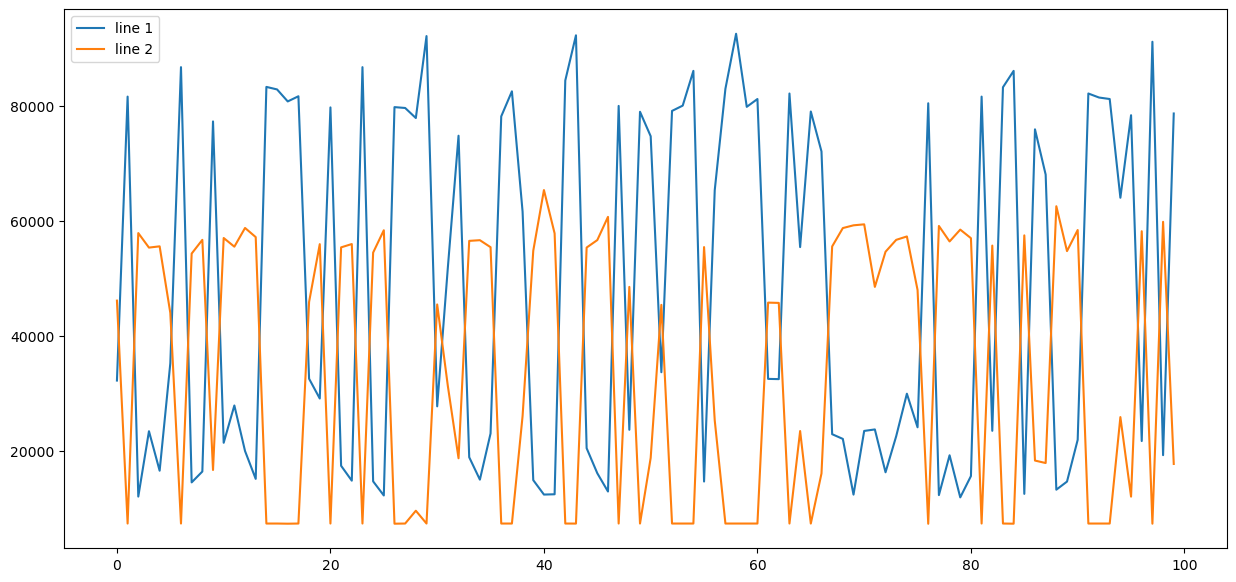

In [74]:
import matplotlib.pyplot as plt
s = newDF[0]
s = s.reset_index(drop=True)
fig = plt.figure(figsize=[15,7])
  
# plot lines
plt.plot(range(0,len(newDF[0][:100])), newDF[0][:100], label = "line 1")
plt.plot(range(0,len(newDF[1][:100])), newDF[1][:100], label = "line 2")
plt.legend()
plt.show()